**Link Presentación PDF:**

https://drive.google.com/file/d/1KyX-68Yc9Y9n6ff3mZYONOuQEXnmWJ8O/view?usp=sharing

**Link Dashboard 1: Análisis de Duración y Distribución de Llamadas**

https://public.tableau.com/views/Telecom_Dashboard_1_In-Out_up/Dashboard1?:language=es-ES&publish=yes&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link


**Link Dashboard 2: Análisis Temporal y Tipología de Llamadas**

https://public.tableau.com/shared/H2DT3NZWJ?:display_count=n&:origin=viz_share_link

# Telecomunicaciones: Identificar operadores ineficaces - “CallMeMaybe”:
## Objetivo: 
**Desarrollar un sistema de identificación de operadores ineficaces para la plataforma “CallMeMaybe”, basado en métricas de desempeño en llamadas.**
- Alcance del análisis:
    - Analizar patrones de eficiencia/ineficiencia en operadores.
    - Establecer criterios cuantitativos para clasificación.
    - Proporcionar insights accionables para supervisores.


## 1. Configuración inicial y carga de datos:
### 1.1 Importación de librerías (pandas, numpy, matplotlib, seaborn, scipy.stats).


In [1]:
# Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import chi2_contingency
import warnings

warnings.filterwarnings('ignore')

### 1.2 Carga de datasets: 'telecom_dataset_us.csv' y 'telecom_clients_us.csv'.

In [2]:
# Cargar datasets

telecom_dataset = pd.read_csv("../data/raw/telecom_dataset_new.csv")
telecom_clients = pd.read_csv("../data/raw/telecom_clients.csv")


### 1.3 Exploración inicial: Estructura, tipos de datos, valores nulos, ausentes y duplicados.

In [3]:
# Exploración inicial de datos

# Información básica de 'telecom_dataset' 
print("telecom_dataset:\n")
print("Información estructural:\n")
print(telecom_dataset.info())
print("\nValores nulos por columna:")
print(telecom_dataset.isnull().sum())
print(f"\nValores duplicados: {telecom_dataset.duplicated().sum()}")

print("="*70)

# Información básica de 'telecom_clients' 
print("\n'telecom_clients':\n")
print("Información estructural:\n")
print(telecom_clients.info())
print("\nValores nulos por columna:\n")
print(telecom_clients.isnull().sum())
print(f"\nValores duplicados: {telecom_clients.duplicated().sum()}")

telecom_dataset:

Información estructural:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53902 entries, 0 to 53901
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   user_id              53902 non-null  int64  
 1   date                 53902 non-null  object 
 2   direction            53902 non-null  object 
 3   internal             53785 non-null  object 
 4   operator_id          45730 non-null  float64
 5   is_missed_call       53902 non-null  bool   
 6   calls_count          53902 non-null  int64  
 7   call_duration        53902 non-null  int64  
 8   total_call_duration  53902 non-null  int64  
dtypes: bool(1), float64(1), int64(4), object(3)
memory usage: 3.3+ MB
None

Valores nulos por columna:
user_id                   0
date                      0
direction                 0
internal                117
operator_id            8172
is_missed_call            0
calls_count               



## 2. Análisis exploratorio de datos (EDA):
### 2.1 Análisis de estadísticas descriptivas de cada variable. 



In [4]:
print("'telecom_dataset':\n")
print("Estadísticas descriptivas:\n")
display(telecom_dataset.describe(include='all'))
print("\nMuestra aleatoria (10 filas):\n")
display(telecom_dataset.sample(10))

print("="*120,"\n")

print("'telecom_clients':\n")
print("Estadísticas descriptivas:\n")
display(telecom_clients.describe(include='all'))
print("\nMuestra aleatoria (10 filas):\n")
telecom_clients.sample(10)

'telecom_dataset':

Estadísticas descriptivas:



,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
count,53902.000000,53902,53902,53785,45730.000000,53902,53902.000000,53902.000000,53902.000000
unique,NaN,119,2,2,NaN,2,NaN,NaN,NaN
top,NaN,2019-11-25 00:00:00+03:00,out,False,NaN,False,NaN,NaN,NaN
freq,NaN,1220,31917,47621,NaN,30334,NaN,NaN,NaN
mean,167295.344477,NaN,NaN,NaN,916535.993002,NaN,16.451245,866.684427,1157.133297
std,598.883775,NaN,NaN,NaN,21254.123136,NaN,62.917170,3731.791202,4403.468763
min,166377.000000,NaN,NaN,NaN,879896.000000,NaN,1.000000,0.000000,0.000000
25%,166782.000000,NaN,NaN,NaN,900788.000000,NaN,1.000000,0.000000,47.000000
50%,167162.000000,NaN,NaN,NaN,913938.000000,NaN,4.000000,38.000000,210.000000
75%,167819.000000,NaN,NaN,NaN,937708.000000,NaN,12.000000,572.000000,902.000000



Muestra aleatoria (10 filas):



,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
2382,166407,2019-10-07 00:00:00+03:00,out,True,888540.0,True,2,0,42
23171,167078,2019-11-11 00:00:00+03:00,in,False,956480.0,False,5,656,733
47612,168187,2019-10-25 00:00:00+03:00,out,False,937868.0,True,1,0,5
48235,168187,2019-11-06 00:00:00+03:00,in,False,937966.0,False,13,922,1018
14876,166879,2019-09-09 00:00:00+03:00,in,False,NaN,True,1,0,21
49911,168228,2019-10-21 00:00:00+03:00,out,False,939738.0,False,1,18,35
24669,167112,2019-10-09 00:00:00+03:00,out,False,904016.0,True,96,0,1824
9058,166658,2019-10-14 00:00:00+03:00,out,False,890410.0,False,14,3162,3413
39671,167747,2019-11-21 00:00:00+03:00,out,False,922474.0,True,4,0,134
19588,166983,2019-11-21 00:00:00+03:00,in,False,901886.0,False,2,89,136



'telecom_clients':

Estadísticas descriptivas:



,user_id,tariff_plan,date_start
count,732.000000,732,732
unique,NaN,3,73
top,NaN,C,2019-09-24
freq,NaN,395,24
mean,167431.927596,NaN,NaN
std,633.810383,NaN,NaN
min,166373.000000,NaN,NaN
25%,166900.750000,NaN,NaN
50%,167432.000000,NaN,NaN
75%,167973.000000,NaN,NaN



Muestra aleatoria (10 filas):



,user_id,tariff_plan,date_start
686,166839,B,2019-08-21
618,167114,B,2019-09-02
283,167532,C,2019-09-19
50,166582,A,2019-08-09
82,167212,C,2019-09-06
725,166815,B,2019-08-20
539,168376,B,2019-10-23
293,167450,C,2019-09-17
619,167078,B,2019-08-30
480,167250,B,2019-09-09


### 2.2 Detección y análisis de valores atípicos.

In [5]:
# Análisis de valores atípicos en variables numéricas
numeric_columns = ['calls_count', 'call_duration', 'total_call_duration']

# Estadísticas para identificar posibles atípicos
print("Estadísticas descriptivas de variables numéricas:\n")
telecom_dataset[numeric_columns].describe(include='all')

Estadísticas descriptivas de variables numéricas:



,calls_count,call_duration,total_call_duration
count,53902.000000,53902.000000,53902.000000
mean,16.451245,866.684427,1157.133297
std,62.917170,3731.791202,4403.468763
min,1.000000,0.000000,0.000000
25%,1.000000,0.000000,47.000000
50%,4.000000,38.000000,210.000000
75%,12.000000,572.000000,902.000000
max,4817.000000,144395.000000,166155.000000


In [6]:
# Análisis detallado IQR (Rango Intercuartílico)
print("Análisis IQR para valores atípicos:")

for col in numeric_columns:
    Q1 = telecom_dataset[col].quantile(0.25)
    Q3 = telecom_dataset[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = telecom_dataset[(telecom_dataset[col] < lower_bound) | (telecom_dataset[col] > upper_bound)]
    
    print(f"\n'{col}':")
    print(f"  - Límite inferior: {lower_bound:.2f}")
    print(f"  - Límite superior: {upper_bound:.2f}")
    print(f"  - Valores atípicos: {len(outliers)} ({len(outliers)/len(telecom_dataset)*100:.2f}%)")
    print(f"  - Valores extremos: {len(telecom_dataset[telecom_dataset[col] > upper_bound * 3])}")

Análisis IQR para valores atípicos:

'calls_count':
  - Límite inferior: -15.50
  - Límite superior: 28.50
  - Valores atípicos: 6653 (12.34%)
  - Valores extremos: 1572

'call_duration':
  - Límite inferior: -858.00
  - Límite superior: 1430.00
  - Valores atípicos: 7571 (14.05%)
  - Valores extremos: 2230

'total_call_duration':
  - Límite inferior: -1235.50
  - Límite superior: 2184.50
  - Valores atípicos: 6575 (12.20%)
  - Valores extremos: 1615



**Observaciones:**

- 'calls_count':
    - Valores atípicos: 12.34%. 
    - Cantidad de valores extremos: 1,572. Número excesivo de llamadas.
    - Límite superior: 28.5 llamadas. Todo valor mayor a 29 llamadas debería ser considerado atípico.
    <br>

- 'call_duration':
    - Valores atípicos: 14.05%.
    - Cantidad de valores extremos: 2,230. Llamadas excesivamente largas.
    - Límite superior: 1,430 segundos (~24 min). Todo valor mayor a 1,430 segundos debería ser considerado atípico.
    <br>

- 'total_call_duration':
    - Valores atípicos: 12.20%.
    - Cantidad de valores extremos: 1,615. Llamadas excesivamente largas.
    - Límite superior: 2,184.5 segundos (~36 min). Todo valor mayor a 2,184.5 segundos debería ser considerado atípico.
    <br>

- Problemas identificados:
    - El método IQR no funciona bien con datos tan sesgados, ya que asume una distribución simétrica y los datos tienen miles de valores en 0 y otros en valores extremos.
     - Límites inferiores negativos obtenidos carecen de sentido práctico en el contexto del proyecto; NO pueden existir llamadas negativas. Indicando que este método no es óptimo para datos con distribución altamente asimétrica.


In [7]:
# Checar consistencia entre duraciones
inconsistent_duration = telecom_dataset[telecom_dataset['total_call_duration'] < telecom_dataset['call_duration']]
print(f"Registros inconsistentes ('total_call_duration' < 'call_duration'): {len(inconsistent_duration)}")

Registros inconsistentes ('total_call_duration' < 'call_duration'): 0


In [8]:
# Análisis de llamadas con duración 0 y conteo de llamada positivo
zero_duration_calls = telecom_dataset[(telecom_dataset['call_duration'] == 0) & (telecom_dataset['calls_count'] > 0)]
print(f"Llamadas con duración 0 y conteo de llamada positivo: {len(zero_duration_calls)}")

Llamadas con duración 0 y conteo de llamada positivo: 23263


**Observaciones:**
- 23,263 registros (43% del dataset) con 'call_duration' = 0. Representa las llamadas contestadas y colgadas inmediatamente, o llamadas perdidas. Sugiere un patrón de negocio real y no necesariamente sobre datos erróneos.

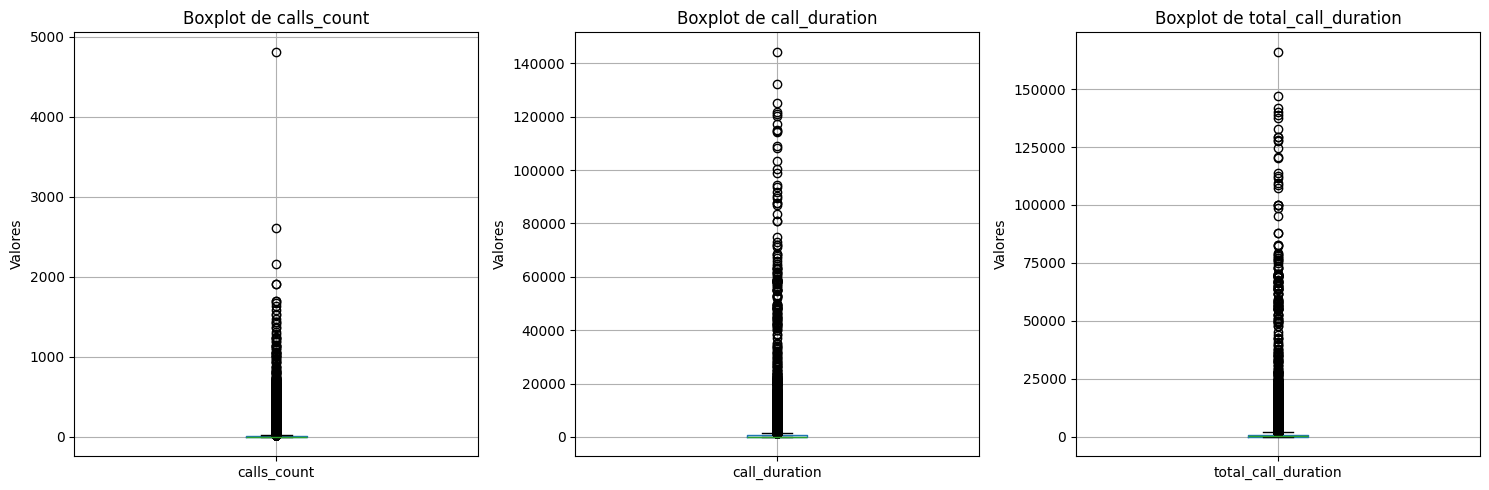

In [9]:
# Visualización de valores atípicos usando boxplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, col in enumerate(numeric_columns):
    telecom_dataset.boxplot(column=col, ax=axes[i])
    axes[i].set_title(f'Boxplot de {col}')
    axes[i].set_ylabel('Valores')

plt.tight_layout()
plt.show()

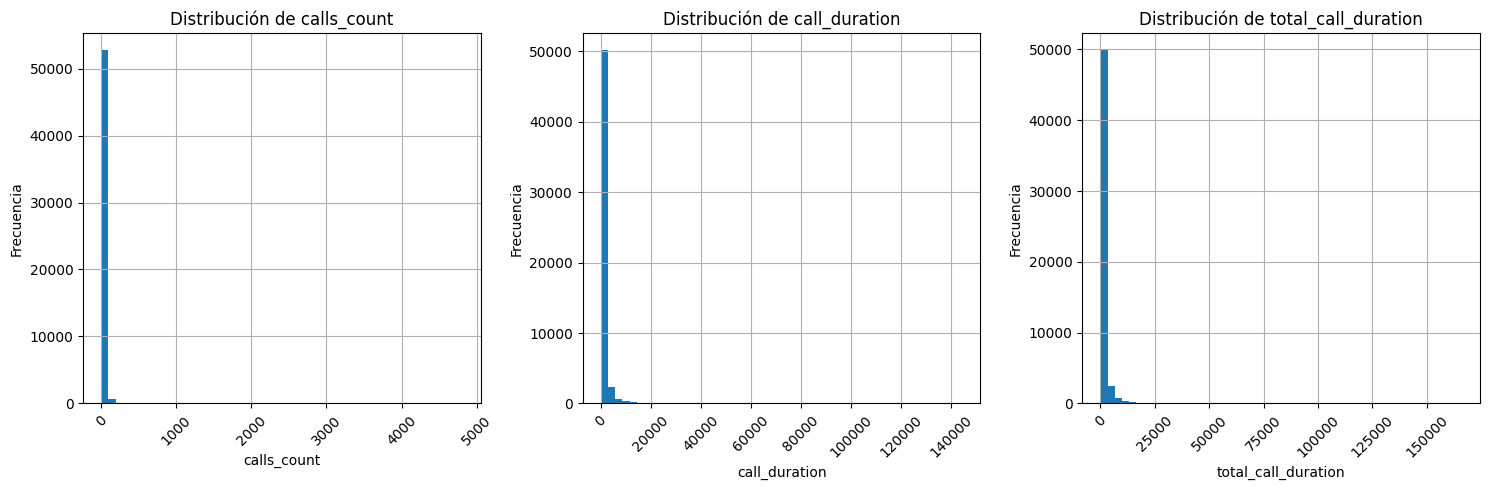

In [10]:
# Distribución de las variables numéricas (histogramas)
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, col in enumerate(numeric_columns):
    telecom_dataset[col].hist(bins=50, ax=axes[i])
    axes[i].set_title(f'Distribución de {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frecuencia')
    axes[i].tick_params(axis='x', rotation=45)
    
plt.tight_layout()
plt.show()


**Observaciones para visualizaciones:**
- Las visualizaciones muestran una cantidad inmensa de datos. La mayoría de valores se concentran cerca de cero mientras que existen demasiados valores atípicos que dificultan la identificación correcta de estos valores.
- Esto confirma la necesidad de métodos estadísticos robustos para el análisis.


### 2.3 Limpieza de datos (duplicados, valores ausentes, nulos y atípicos).

In [11]:
# Eliminar duplicados
print(f"Registros originales: {len(telecom_dataset)}")
print(f"Duplicados antes de limpieza: {telecom_dataset.duplicated().sum()}")
telecom_dataset = telecom_dataset.drop_duplicates()

print(f"Duplicados después de limpieza: {telecom_dataset.duplicated().sum()}")
print(f"Registros restantes: {len(telecom_dataset)}")

Registros originales: 53902
Duplicados antes de limpieza: 4900
Duplicados después de limpieza: 0
Registros restantes: 49002


In [12]:
# Análisis detallado de valores nulos
print("Valores nulos por columna:\n")
null_analysis = telecom_dataset.isnull().sum()
print(null_analysis[null_analysis > 0])
print("="*60)

# Definir las variables para análisis de nulos
operator_id_nulls = telecom_dataset[telecom_dataset['operator_id'].isnull()]
internal_nulls = telecom_dataset[telecom_dataset['internal'].isnull()]

# Análisis detallado de nulos en 'operator_id'
print("\nCaracterísticas de registros con 'operator_id' nulo:\n")
print(operator_id_nulls[['direction', 'internal', 'is_missed_call']].value_counts())
print("="*60)

# Análisis detallado de los nulos en 'internal'
print("\nCaracterísticas de registros con 'internal' nulo:\n")
print(internal_nulls[['direction', 'is_missed_call']].value_counts())

Valores nulos por columna:

internal        110
operator_id    7456
dtype: int64

Características de registros con 'operator_id' nulo:

direction  internal  is_missed_call
in         False     True              6870
           True      True               279
out        False     True               108
in         False     False               62
out        False     False               38
           True      True                31
                     False                7
in         True      False                6
Name: count, dtype: int64

Características de registros con 'internal' nulo:

direction  is_missed_call
in         False             54
           True              54
out        True               2
Name: count, dtype: int64



**Observaciones:**

- En 'operator_id' la gran mayoría (15.2% del datast limpio) de los datos nulos provienen de llamadas entrantes perdidas; representando un comportamiento real de negocio. 
- En 'internal' los registros de datos nulos son balanceados entre llamadas contestadas y perdidas.


In [13]:
# Limpieza de nulos en 'internal'
print(f"Registros antes de eliminar nulos en 'internal': {len(telecom_dataset)}")
telecom_dataset = telecom_dataset.dropna(subset=['internal'])
print(f"Registros después de eliminar nulos en 'internal': {len(telecom_dataset)}")

Registros antes de eliminar nulos en 'internal': 49002
Registros después de eliminar nulos en 'internal': 48892


In [14]:
# Análisis de datos ausentes
print("Análisis de datos ausentes:\n")

# Checar cadenas vacías en columnas de texto
print("Cadenas vacías en columnas de texto:\n")
text_columns = ['direction', 'internal']
for col in text_columns:
    empty_strings = (telecom_dataset[col] == '').sum()
    print(f"Cadenas vacías en '{col}': {empty_strings}")
print("="*60)

# Checar ceros que podrían representar datos ausentes
print("\nCeros (0) que podrían representar datos ausentes:\n")
print("Registros con 'calls_count' = 0:")
print(f"{len(telecom_dataset[telecom_dataset['calls_count'] == 0])}")

print("\nRegistros con 'call_duration' = 0:")
print(f"{len(telecom_dataset[telecom_dataset['call_duration'] == 0])}")

print("\nRegistros con 'total_call_duration' = 0:")
print(f"{len(telecom_dataset[telecom_dataset['total_call_duration'] == 0])}")
print("="*60)

# Checar valores únicos en columnas categóricas
print("\nValores únicos en columnas categórica:\n")
for col in text_columns:
    unique_vals = telecom_dataset[col].unique()
    print(f"'{col}': {unique_vals}")

Análisis de datos ausentes:

Cadenas vacías en columnas de texto:

Cadenas vacías en 'direction': 0
Cadenas vacías en 'internal': 0

Ceros (0) que podrían representar datos ausentes:

Registros con 'calls_count' = 0:
0

Registros con 'call_duration' = 0:
21119

Registros con 'total_call_duration' = 0:
1191

Valores únicos en columnas categórica:

'direction': ['in' 'out']
'internal': [False True]


**Observaciones:**

- No hay cadenas vacías en columnas de texto.
- No hay valores "unknown" o placeholders.
- 'calls_count' = 0: 0 registros (tienen al menos 1 llamada).
- 'call_duration' = 0: 21,119 registros (43.2% del dataset). Representa llamadas contestadas y colgadas inmediatamente o llamadas perdidas (NO son datos ausents, es un comportamiento real).
- 'total_call_duration' = 0: 1,191 registros (2.4% del dataset). Indica llamadas con cero segundos incluyendo tiempo de espera, podrían ser errores de registro o llamadas que fallaron inmediatamente.

In [15]:
# Investigar registros con 'total_call_duration' = 0
zero_total_duration = telecom_dataset[telecom_dataset['total_call_duration'] == 0]
print("Características de registros con total_call_duration = 0:\n")
print(zero_total_duration[['direction', 'internal', 'is_missed_call', 'call_duration']].value_counts())

Características de registros con total_call_duration = 0:

direction  internal  is_missed_call  call_duration
out        True      True            0                736
in         False     True            0                226
out        False     True            0                221
in         True      True            0                  6
out        True      False           0                  2
Name: count, dtype: int64


**Observaciones:**

- Exceptuando 2 llamadas de salida, todas las demás son llamadas perdidas. Puede ser debido a que fueron llamadas realizadas con errores de conexión o que fueron contestadas y colgadas al instante.

In [16]:
# Tratamiento de valores atípicos

# Análisis de percentiles para valores atípicos
print("Percentiles para valores atípicos:")

for col in numeric_columns:
    print(f"\n'{col}':")
    for percentile in [95, 97, 99, 99.5, 99.9]:
        threshold = telecom_dataset[col].quantile(percentile/100)
        count_above = len(telecom_dataset[telecom_dataset[col] > threshold])
        print(f"  - Percentil {percentile}%: {threshold:.2f}.\n  - Hay {count_above} registros por encima de este valor.\n")
    print("-"*60)

print("="*60)

# Análisis de los valores extremos
print("\nValores extremos:")
for col in numeric_columns:
    top_10 = telecom_dataset[col].nlargest(10)
    print(f"\n'{col}' - Top 10 valores:")
    print(top_10.values)
    print("-"*80)

Percentiles para valores atípicos:

'calls_count':
  - Percentil 95%: 62.00.
  - Hay 2431 registros por encima de este valor.

  - Percentil 97%: 84.00.
  - Hay 1459 registros por encima de este valor.

  - Percentil 99%: 165.09.
  - Hay 489 registros por encima de este valor.

  - Percentil 99.5%: 375.09.
  - Hay 245 registros por encima de este valor.

  - Percentil 99.9%: 864.64.
  - Hay 49 registros por encima de este valor.

------------------------------------------------------------

'call_duration':
  - Percentil 95%: 3730.45.
  - Hay 2445 registros por encima de este valor.

  - Percentil 97%: 5375.81.
  - Hay 1467 registros por encima de este valor.

  - Percentil 99%: 10324.90.
  - Hay 489 registros por encima de este valor.

  - Percentil 99.5%: 14824.34.
  - Hay 245 registros por encima de este valor.

  - Percentil 99.9%: 58786.03.
  - Hay 49 registros por encima de este valor.

------------------------------------------------------------

'total_call_duration':
  - Perce

In [17]:
# Tratamiento de valores extremos con percentil 99%
top_extreme = telecom_dataset[telecom_dataset[col] > telecom_dataset[col].quantile(0.99)]
print(f"Valores arriba del percentil 99%: \n{len(top_extreme)}")

Valores arriba del percentil 99%: 
489


**Observaciones:**

- 'calls_count':
    - Percentil 99%: 165 llamadas, 489 registros mayores al percentil.
    - Valor máximo: 4,817 llamadas (físicamente imposible para un operador).
    - Top 10: 4817, 2614, 2168, 1917, 1914, 1705, 1679, 1641, 1590, 1533. Valores claramente erróneos.
    <br>

- 'call_duration':
    - Percentil 99%: 10,324 segundos (2.9 horas). Posible aunque es un valor muy alto.
    - Valor máximo: 144,395 segundos (40.1 horas). Imposible.
    <br>

- 'total_call_duration':
    - Percentil 99%: 12,969 segundos (3.6 horas). Posible, pero es un valor alto.
    - Valor máximo: 166,155 segundos (46.1 horas). Imposible.

In [18]:
# Eliminar valores imposibles
print("Eliminar valores imposibles:\n")

# Límites razonables basados en análisis
reasonable_limits = {
    'calls_count': 500,        # Máximo ~500 llamadas/día (posible físicamente)
    'call_duration': 28800,     # 8 horas máximo (jornada laboral)
    'total_call_duration': 36000  # 10 horas máximo (incluyendo espera)
}

for col, limit in reasonable_limits.items():
    before = len(telecom_dataset)
    telecom_dataset = telecom_dataset[telecom_dataset[col] <= limit]
    after = len(telecom_dataset)
    removed = before - after
    print(f"Registros donde '{col}' es mayor que {limit}:\nEliminados: {removed} registros ({removed/before*100:.2f}%)\n")

print(f"\nRegistros finales: {len(telecom_dataset)}")

Eliminar valores imposibles:

Registros donde 'calls_count' es mayor que 500:
Eliminados: 167 registros (0.34%)

Registros donde 'call_duration' es mayor que 28800:
Eliminados: 44 registros (0.09%)

Registros donde 'total_call_duration' es mayor que 36000:
Eliminados: 1 registros (0.00%)


Registros finales: 48680


### 2.4 Transformaciones necesarias (fechas, categorías, normalizaciones).

In [19]:
# Convertir fechas a datetime

# 'telecom_dataset'
telecom_dataset['date'] = pd.to_datetime(telecom_dataset['date'], errors='coerce')

# 'telecom_clients'
telecom_clients['date_start'] = pd.to_datetime(telecom_clients['date_start'], errors='coerce')

print("Conversión de fechas a datetime:\n")
print("'telecom_dataset':")
print(telecom_dataset['date'].dtype)
print()
print("'telecom_clients':")
print(telecom_clients['date_start'].dtype)

Conversión de fechas a datetime:

'telecom_dataset':
datetime64[ns, UTC+03:00]

'telecom_clients':
datetime64[ns]


In [20]:
# Información del rango de fechas
print("Rango de fechas:\n")
print(f"'telecom_dataset' - 'date': {telecom_dataset['date'].min()} a {telecom_dataset['date'].max()}")
print()
print(f"'telecom_clients' - 'date_start': {telecom_clients['date_start'].min()} a {telecom_clients['date_start'].max()}")

Rango de fechas:

'telecom_dataset' - 'date': 2019-08-02 00:00:00+03:00 a 2019-11-28 00:00:00+03:00

'telecom_clients' - 'date_start': 2019-08-01 00:00:00 a 2019-10-31 00:00:00



**Observaciones:**

- Rangos temporales:
    - 'telecom_dataset': 2 agosto 2019 - 28 noviembre 2019 (~4 meses).
    - 'telecom_clients': 1 agosto 2019 - 31 octubre 2019 (~3 meses).
    <br>

- Zona horaria: 'telecom_dataset' tiene un offset de +03:00 (horario de Moscú, el Cairo y Estambul).

- Consistencia temporal: Los datos de clientes cubren prácticamente el mismo período que las llamadas. Aunque no se tuvieron nuevos clientes en noviembre, los existentes siguieron usando el servicio.


In [21]:
# Transformación de  categorías
print("Transformación de  categorías:\n")

# Valores únicos antes de la conversión
print("Valores únicos antes de la transformación:\n")
print(f"'direction': {telecom_dataset['direction'].unique()}")
print(f"'internal': {telecom_dataset['internal'].unique()}")
print(f"'tariff_plan': {telecom_clients['tariff_plan'].unique()}")
print("-"*60)

# Transformar 'internal' de object a boolean
print("\n'internal' de object a boolean:\n")
print(f"Tipo antes: {telecom_dataset['internal'].dtype}")
telecom_dataset['internal'] = telecom_dataset['internal'].astype(bool)
print(f"Tipo después: {telecom_dataset['internal'].dtype}")
print(f"Valores únicos: {telecom_dataset['internal'].unique()}")
print("-"*60)

# Transformar 'direction' a category
print("\n'direction' a category:\n")
print(f"Tipo antes: {telecom_dataset['direction'].dtype}")
telecom_dataset['direction'] = telecom_dataset['direction'].astype('category')
print(f"Tipo después: {telecom_dataset['direction'].dtype}")
print(f"Categorías: {telecom_dataset['direction'].cat.categories}")
print("-"*60)

# Transformar 'tariff_plan' a category
print("\n'tariff_plan' a category:\n")
print(f"Tipo antes: {telecom_clients['tariff_plan'].dtype}")
telecom_clients['tariff_plan'] = telecom_clients['tariff_plan'].astype('category')
print(f"Tipo después: {telecom_clients['tariff_plan'].dtype}")
print(f"Categorías: {telecom_clients['tariff_plan'].cat.categories}")
print("-"*60)

# Checar transformaciones finales
print("Tipos actuales:\n")
print("'telecom_dataset':\n")
print(telecom_dataset.dtypes)
print("\n'telecom_clients':\n")
print(telecom_clients.dtypes)

Transformación de  categorías:

Valores únicos antes de la transformación:

'direction': ['in' 'out']
'internal': [False True]
'tariff_plan': ['A' 'C' 'B']
------------------------------------------------------------

'internal' de object a boolean:

Tipo antes: object
Tipo después: bool
Valores únicos: [False  True]
------------------------------------------------------------

'direction' a category:

Tipo antes: object
Tipo después: category
Categorías: Index(['in', 'out'], dtype='object')
------------------------------------------------------------

'tariff_plan' a category:

Tipo antes: object
Tipo después: category
Categorías: Index(['A', 'B', 'C'], dtype='object')
------------------------------------------------------------
Tipos actuales:

'telecom_dataset':

user_id                                    int64
date                   datetime64[ns, UTC+03:00]
direction                               category
internal                                    bool
operator_id                

In [22]:
# Checar consistencia entre duraciones
inconsistent_after = len(telecom_dataset[telecom_dataset['total_call_duration'] < telecom_dataset['call_duration']])
print(f"Registros inconsistentes después de corrección: {inconsistent_after}")

Registros inconsistentes después de corrección: 0


In [23]:
# Transformación de normalizaciones
#print("Normalización de variables numéricas:\n")

# Variables a normalizar
#numeric_to_normalize = ['calls_count', 'call_duration', 'total_call_duration', 'call_waiting_time']

# Crear scaler
#scaler = MinMaxScaler()

# Aplicar normalización
#telecom_dataset[numeric_to_normalize] = scaler.fit_transform(telecom_dataset[numeric_to_normalize])


#print("Rangos después de la normalización (0-1):")
#for col in numeric_to_normalize:
#    min_val = telecom_dataset[col].min()
#    max_val = telecom_dataset[col].max()
#    print(f"'{col}': {min_val:.4f} a {max_val:.4f}")

In [24]:
# Ejemplos después de normalizar
#print("Ejemplos después de la normalización:\n")
#telecom_dataset[numeric_to_normalize].sample(10)

In [25]:
# Función para interpretar valores normalizados
#def normalization_interpretation(normalized_value, column):
#    """Convierte valor normalizado (0-1) a valor original aproximado"""
#    if column == 'calls_count':
#        min_orig, max_orig = 1, 499
#    elif column == 'call_duration':
#        min_orig, max_orig = 0, 28333
#    elif column == 'total_call_duration':
#        min_orig, max_orig = 0, 35964
    
#    original_value = min_orig + (normalized_value * (max_orig - min_orig))
#    return original_value

# Ejemplos de interpretación
#print("Interpretar de valores normalizados:\n")
#print("Ejemplos de conversión 0-1 a valores originales:\n")

#examples = [0.0, 0.25, 0.5, 0.75, 1.0]
#for col in ['calls_count', 'call_duration', 'total_call_duration']:
#    print(f"'{col}':")
#    for example in examples:
#        original_val = normalization_interpretation(example, col)
#        if col == 'calls_count':
#            print(f"  {example} a {original_val:.0f} llamadas")
#        else:
#            print(f"  {example} a {original_val:.0f} segundos ({original_val/3600:.2f} horas)")
#    print()

In [26]:
# Checar qué problema había
#print("Análisis detallad del problema:\n")

# Tomar un ejemplo específico
#sample_idx = telecom_dataset[telecom_dataset['total_call_duration'] < telecom_dataset['call_duration']].index[0]
#sample_row = telecom_dataset.loc[sample_idx]

#print(f"Ejemplo de registro inconsistente (índice {sample_idx}):\n")
#print(f"'call_duration' normalizado: {sample_row['call_duration']}")
#print(f"'total_call_duration' normalizado: {sample_row['total_call_duration']}")
#print(f"Diferencia: {sample_row['total_call_duration'] - sample_row['call_duration']}")

# Checar si se tienen los valores originales
#print(f"¿Se tienen los valores originales?: {'call_duration_original' in telecom_dataset.columns}")


**NOTA:**

- Se decidió NO usar la normalización ya que al probar los registros inconsistentes luego de esto, aparecían 19,154 inconsistencias.
- También se tenían números negativos en la nueva columna 'call_waiting_time'.



## 3. Preprocesamiento y feature engineering:
### 3.1 Creación de variables derivadas y agregaciones por operador.


In [27]:
# Creación de variables derivadas (eficiencia)
print("Creación de variables derivadas de eficiencia:\n")

# 'call_waiting_time'
telecom_dataset['call_waiting_time'] = telecom_dataset['total_call_duration'] - telecom_dataset['call_duration']

display(telecom_dataset)

Creación de variables derivadas de eficiencia:



,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,call_waiting_time
0,166377,2019-08-04 00:00:00+03:00,in,False,NaN,True,2,0,4,4
1,166377,2019-08-05 00:00:00+03:00,out,True,880022.0,True,3,0,5,5
2,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,True,1,0,1,1
3,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,False,1,10,18,8
4,166377,2019-08-05 00:00:00+03:00,out,False,880022.0,True,3,0,25,25
...,...,...,...,...,...,...,...,...,...,...
53896,168606,2019-11-10 00:00:00+03:00,out,True,957922.0,False,1,0,25,25
53897,168606,2019-11-10 00:00:00+03:00,out,True,957922.0,True,1,0,38,38
53898,168606,2019-11-11 00:00:00+03:00,out,True,957922.0,False,2,479,501,22
53899,168606,2019-11-15 00:00:00+03:00,out,True,957922.0,False,4,3130,3190,60


In [28]:
# Agregaciones por operador para métricas de eficiencia + volumen por tipo
print("Agrupación por operador:\n")

# Filtrar registros con 'operator_id' (excluir nulos de llamadas perdidas)
operator_data = telecom_dataset[telecom_dataset['operator_id'].notnull()].copy()

# Agrupar por operador y calcular métricas
operator_metrics = operator_data.groupby('operator_id').agg({
    'calls_count': 'sum',
    'is_missed_call': 'sum',  # Total llamadas perdidas
    'call_waiting_time': 'mean',  # Tiempo de espera promedio
    'call_duration': 'mean',  # Duración promedio de llamada
    'total_call_duration': 'mean',
    'direction': lambda x: (x == 'in').sum(),  # Llamadas entrantes
    'internal': lambda x: (x == True).sum()    # Llamadas internas
}).reset_index()

# Calcular métricas derivadas
operator_metrics['incoming_calls'] = operator_metrics['direction']
operator_metrics['outgoing_calls'] = operator_metrics['calls_count'] - operator_metrics['incoming_calls']
operator_metrics['internal_calls'] = operator_metrics['internal']
operator_metrics['external_calls'] = operator_metrics['calls_count'] - operator_metrics['internal_calls']

# Seleccionar y renombrar columnas finales
operator_metrics = operator_metrics[[
    'operator_id', 
    'calls_count',
    'incoming_calls', 
    'outgoing_calls', 
    'internal_calls',
    'external_calls',
    'is_missed_call',
    'call_waiting_time',
    'call_duration',
    'total_call_duration'
]]

operator_metrics.columns = [
    'operator_id', 
    'total_calls', 
    'incoming_calls', 
    'outgoing_calls', 
    'internal_calls',
    'external_calls',
    'missed_calls', 
    'avg_waiting_time', 
    'avg_call_duration',
    'avg_total_duration'
]

print(f"Métricas calculadas para {len(operator_metrics)} operadores.\n")
print("Muestra de 10 filas:\n")
operator_metrics.sample(10)

Agrupación por operador:



Métricas calculadas para 1092 operadores.

Muestra de 10 filas:



,operator_id,total_calls,incoming_calls,outgoing_calls,internal_calls,external_calls,missed_calls,avg_waiting_time,avg_call_duration,avg_total_duration
390,914842.0,6,6,0,0,6,0,18.833333,289.666667,308.500000
1085,971354.0,6,2,4,0,6,0,42.000000,371.500000,413.500000
322,908984.0,8,0,8,0,8,1,104.000000,135.500000,239.500000
151,898422.0,87,10,77,0,87,5,32.727273,263.818182,296.545455
703,937786.0,15,2,13,3,12,2,37.142857,146.285714,183.428571
594,930326.0,11,8,3,0,11,0,14.666667,156.666667,171.333333
242,904344.0,9,2,7,1,8,2,21.000000,46.000000,67.000000
259,905574.0,432,3,429,72,360,44,33.972727,135.927273,169.900000
813,942174.0,6,0,6,0,6,1,27.000000,154.666667,181.666667
1029,960672.0,219,0,219,4,215,10,159.250000,823.700000,982.950000


In [29]:
# Checar consistencia entre duraciones
inconsistent_duration = telecom_dataset[telecom_dataset['total_call_duration'] < telecom_dataset['call_duration']]
print(f"Registros inconsistentes ('total_call_duration' < 'call_duration'): {len(inconsistent_duration)}")

Registros inconsistentes ('total_call_duration' < 'call_duration'): 0


In [30]:
# Creación de 'efficiency_ratio'

# Calcular llamadas contestadas
operator_metrics['answered_calls'] = operator_metrics['total_calls'] - operator_metrics['missed_calls']

# Calcular tasa de contestación
operator_metrics['answer_rate'] = operator_metrics['answered_calls'] / operator_metrics['total_calls']

# Buffer pequeño para evitar división por cero
operator_metrics['efficiency_ratio'] = (
    operator_metrics['answer_rate'] / 
    (operator_metrics['avg_waiting_time'] + 0.1) 
)

print(f"Rango del ratio:\n{operator_metrics['efficiency_ratio'].min():.4f} a {operator_metrics['efficiency_ratio'].max():.4f}")

# Estadísticas de 'efficiency_ratio'
print("\nEstadísticas de 'efficiency_ratio':")
print(operator_metrics['efficiency_ratio'].describe(include='all'))

Rango del ratio:
0.0000 a 8.4615

Estadísticas de 'efficiency_ratio':
count    1092.000000
mean        0.047710
std         0.337347
min         0.000000
25%         0.005440
50%         0.018453
75%         0.035708
max         8.461538
Name: efficiency_ratio, dtype: float64


In [31]:
# Prueba para encontrar el operador con máximo 'efficiency_ratio'
top_operator = operator_metrics[operator_metrics['efficiency_ratio'] == operator_metrics['efficiency_ratio'].max()]

print("Operador más eficiente:\n")
print(f"Operator ID: {top_operator['operator_id'].values[0]}")
print(f"Efficiency Ratio: {top_operator['efficiency_ratio'].values[0]:.4f}")
print(f"Answer Rate: {top_operator['answer_rate'].values[0]:.4f}")
print(f"Avg Waiting Time: {top_operator['avg_waiting_time'].values[0]:.2f} segundos")
print(f"Total Calls: {top_operator['total_calls'].values[0]:.0f}")
print(f"Missed Calls: {top_operator['missed_calls'].values[0]:.0f}")

Operador más eficiente:

Operator ID: 946454.0
Efficiency Ratio: 8.4615
Answer Rate: 0.8462
Avg Waiting Time: 0.00 segundos
Total Calls: 13
Missed Calls: 2


### 3.2 Creación de features temporales.

In [32]:
# Features para telecom_dataset
print("Features creados para 'telecom_dataset':\n")

# Día de la semana (0=Lunes, 6=Domingo)
telecom_dataset['day_of_week'] = telecom_dataset['date'].dt.dayofweek

# Es fin de semana
telecom_dataset['is_weekend'] = telecom_dataset['day_of_week'].isin([5, 6])

# Mes
telecom_dataset['month'] = telecom_dataset['date'].dt.month

# Día del mes
telecom_dataset['day_of_month'] = telecom_dataset['date'].dt.day

display(telecom_dataset[['day_of_week', 'is_weekend', 'month', 'day_of_month']])

Features creados para 'telecom_dataset':



,day_of_week,is_weekend,month,day_of_month
0,6,True,8,4
1,0,False,8,5
2,0,False,8,5
3,0,False,8,5
4,0,False,8,5
...,...,...,...,...
53896,6,True,11,10
53897,6,True,11,10
53898,0,False,11,11
53899,4,False,11,15


In [33]:
# Features para 'telecom_clients' corrigiendo la zona horaria
print("\nFeatures creados para 'telecom_clients':\n")

# Normalizar zonas horarias antes de la resta
max_date = telecom_dataset['date'].max().tz_convert(None)  # Quitar zona horaria
telecom_clients['days_since_registration'] = (
    max_date - telecom_clients['date_start']
).dt.days

# Mes de registro
telecom_clients['registration_month'] = telecom_clients['date_start'].dt.month

display(telecom_clients)


Features creados para 'telecom_clients':



,user_id,tariff_plan,date_start,days_since_registration,registration_month
0,166713,A,2019-08-15,104,8
1,166901,A,2019-08-23,96,8
2,168527,A,2019-10-29,29,10
3,167097,A,2019-09-01,87,9
4,168193,A,2019-10-16,42,10
...,...,...,...,...,...
727,166554,B,2019-08-08,111,8
728,166911,B,2019-08-23,96,8
729,167012,B,2019-08-28,91,8
730,166867,B,2019-08-22,97,8


In [34]:
# Distribución por días de la semana
print("\nDistribución por días de la semana:")
print(telecom_dataset['day_of_week'].value_counts().sort_index())


Distribución por días de la semana:
day_of_week
0    8087
1    8971
2    8991
3    9203
4    8239
5    2947
6    2242
Name: count, dtype: int64


## 4. Identificación de operadores ineficaces (Definición de criterios de ineficacia):
### 4.1 Establecimiento de umbrales:
#### 4.1.1 Número de llamadas perdidas (umbrales basados en percentiles).

In [35]:
# Identificación de operadores ineficaces

# Análisis de percentiles para llamadas perdidas
print("Percentiles de llamadas perdidas por operador:")
for percentile in [25, 50, 75, 90, 95]:
    threshold = operator_metrics['missed_calls'].quantile(percentile/100)
    count_above = len(operator_metrics[operator_metrics['missed_calls'] > threshold])
    print(f"  - Percentil {percentile}% tiene más de {threshold:.2f} llamadas perdidas, con {count_above} operadores que superan este valor")

Percentiles de llamadas perdidas por operador:
  - Percentil 25% tiene más de 1.00 llamadas perdidas, con 743 operadores que superan este valor
  - Percentil 50% tiene más de 5.00 llamadas perdidas, con 532 operadores que superan este valor
  - Percentil 75% tiene más de 18.00 llamadas perdidas, con 271 operadores que superan este valor
  - Percentil 90% tiene más de 34.00 llamadas perdidas, con 108 operadores que superan este valor
  - Percentil 95% tiene más de 49.45 llamadas perdidas, con 55 operadores que superan este valor


In [36]:
# Clasificación de umbrales por llamadas perdidas

# Definir bins 
bins_missed_calls = [-1, 1, 5, 18, 34, float('inf')]

operator_metrics['missed_calls_level'] = pd.cut(
    operator_metrics['missed_calls'],
    bins=bins_missed_calls,
    labels=['very_low', 'low', 'medium', 'high', 'very_high']
)

print("Distribución de operadores por umbral de llamadas perdidas:")
for level in ['very_low', 'low', 'medium', 'high', 'very_high']:
    count = len(operator_metrics[operator_metrics['missed_calls_level'] == level])
    if level == 'very_low':
        print(f"  - Umbral '{level}': {count} operadores, con 0-1 llamadas perdidas")
    elif level == 'low':
        print(f"  - Umbral '{level}': {count} operadores, con 2-5 llamadas perdidas")
    elif level == 'medium':
        print(f"  - Umbral '{level}': {count} operadores, con 6-18 llamadas perdidas")
    elif level == 'high':
        print(f"  - Umbral '{level}': {count} operadores, con 19-34 llamadas perdidas")
    elif level == 'very_high':
        print(f"  - Umbral '{level}': {count} operadores, con 35 o más llamadas perdidas")

Distribución de operadores por umbral de llamadas perdidas:
  - Umbral 'very_low': 349 operadores, con 0-1 llamadas perdidas
  - Umbral 'low': 211 operadores, con 2-5 llamadas perdidas
  - Umbral 'medium': 261 operadores, con 6-18 llamadas perdidas
  - Umbral 'high': 163 operadores, con 19-34 llamadas perdidas
  - Umbral 'very_high': 108 operadores, con 35 o más llamadas perdidas


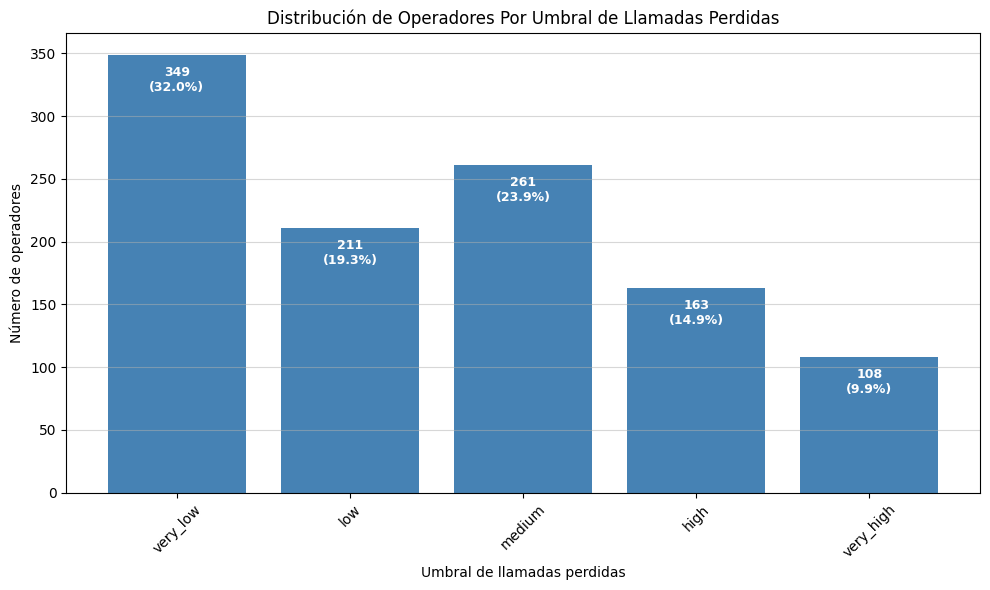

In [37]:
# Gráfico de distribución de umbrales de llamadas perdidas 
distribution = operator_metrics['missed_calls_level'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
bars = plt.bar(distribution.index.astype(str), distribution.values, color='steelblue')

# Añadir valores y porcentajes en las barras
total_operators = len(operator_metrics)
for bar in bars:
    height = bar.get_height()
    percentage = (height / total_operators) * 100
    plt.text(bar.get_x() + bar.get_width()/2., height - 20,  
             f'{height}\n({percentage:.1f}%)', ha='center', va='center', fontsize=9, color='white', weight='bold')

plt.title('Distribución de Operadores Por Umbral de Llamadas Perdidas')
plt.xlabel('Umbral de llamadas perdidas')
plt.ylabel('Número de operadores')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.5)
plt.tight_layout()
plt.show()

**Observaciones:**

- Distribución de llamadas perdidas: 
    - 'very_low': 349 operadores (32%).
    - 'low': 211 operadores (19%).
    - 'medium': 261 operadores (24%).
    - 'high': 163 operadores (15%).
    - 'very_high': 108 operadores (10%).
    <br>

- El 10% de operadores (108) están en 'very_high' con más de 34 llamadas perdidas son candidatos fuertes a "ineficaces".
- El 15% de operadores (163) están en 'high' con más de 18 llamadas perdidas son candidatos a "ineficaces".

#### 4.1.2 Tiempo promedio de espera (límites superiores).

In [38]:
# Tiempo promedio de espera (límites superiores)

# Análisis de percentiles para tiempo de espera
print("Percentiles de tiempo de espera por operador (segundos):")
for percentile in [25, 50, 75, 90, 95]:
    threshold = operator_metrics['avg_waiting_time'].quantile(percentile/100)
    count_above = len(operator_metrics[operator_metrics['avg_waiting_time'] > threshold])
    print(f"  - Percentil {percentile}%: {threshold:.2f} segundos, con {count_above} operadores que superan este valor")

Percentiles de tiempo de espera por operador (segundos):
  - Percentil 25%: 23.00 segundos, con 817 operadores que superan este valor
  - Percentil 50%: 46.62 segundos, con 546 operadores que superan este valor
  - Percentil 75%: 159.76 segundos, con 273 operadores que superan este valor
  - Percentil 90%: 552.95 segundos, con 110 operadores que superan este valor
  - Percentil 95%: 1139.79 segundos, con 55 operadores que superan este valor


In [39]:
# Clasificación por tiempo de espera 

# Definir bins basados en análisis de percentiles
bins_waiting_time = [-1, 23, 47, 160, 553, float('inf')]

operator_metrics['waiting_time_level'] = pd.cut(
    operator_metrics['avg_waiting_time'],
    bins=bins_waiting_time,
    labels=['very_low', 'low', 'medium', 'high', 'very_high']
)

print("Distribución de operadores por umbral de tiempo de espera:")
for level in ['very_low', 'low', 'medium', 'high', 'very_high']:
    count = len(operator_metrics[operator_metrics['waiting_time_level'] == level])
    if level == 'very_low':
        print(f"  - Umbral '{level}': {count} operadores, con 0-23 segundos")
    elif level == 'low':
        print(f"  - Umbral '{level}': {count} operadores, con 24-47 segundos")
    elif level == 'medium':
        print(f"  - Umbral '{level}': {count} operadores, con 48-160 segundos")
    elif level == 'high':
        print(f"  - Umbral '{level}': {count} operadores, con 161-553 segundos")
    elif level == 'very_high':
        print(f"  - Umbral '{level}': {count} operadores, con 554 o más segundos")

Distribución de operadores por umbral de tiempo de espera:
  - Umbral 'very_low': 275 operadores, con 0-23 segundos
  - Umbral 'low': 275 operadores, con 24-47 segundos
  - Umbral 'medium': 269 operadores, con 48-160 segundos
  - Umbral 'high': 163 operadores, con 161-553 segundos
  - Umbral 'very_high': 110 operadores, con 554 o más segundos


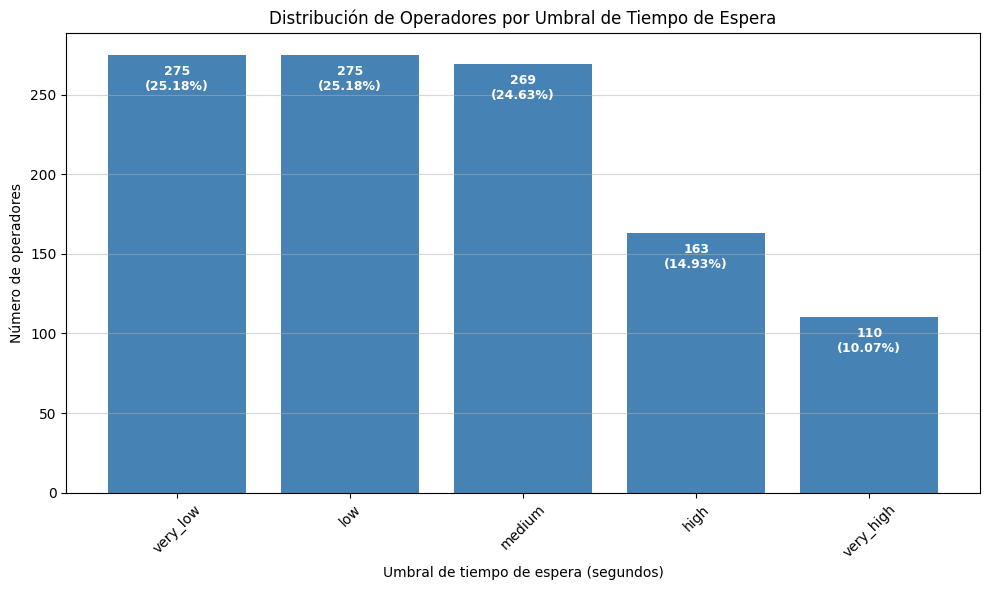

In [40]:
# Gráfico de distribución de umbrales de tiempo de espera
distribution_waiting = operator_metrics['waiting_time_level'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
bars = plt.bar(distribution_waiting.index.astype(str), distribution_waiting.values, color='steelblue')

# Añadir valores y porcentajes en las barras
total_operators = len(operator_metrics)
for bar in bars:
    height = bar.get_height()
    percentage = (height / total_operators) * 100
    plt.text(bar.get_x() + bar.get_width()/2., height - 15,  
             f'{height}\n({percentage:.2f}%)', ha='center', va='center', fontsize=9, color='white', weight='bold')

plt.title('Distribución de Operadores por Umbral de Tiempo de Espera')
plt.xlabel('Umbral de tiempo de espera (segundos)')
plt.ylabel('Número de operadores')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.5)
plt.tight_layout()
plt.show()

**Observaciones:**

- Distribución de tiempo de espera:
    - 'very_low': 275 operadores (25%). Tiempo de espera óptimo. (0-23 segundos).
    - 'low': 275 operadores (25%). Tiempo de espera aceptable (24-47 segundos).
    - 'medium': 269 operadores (25%). Tiempo de espera elevado, con oportunidad de mejora. (48-160 segundos). 
    - 'high': 163 operadores (15%). Tiempo de espera alto, niveles críticos (161-553 segundos).
    - 'very_high': 110 operadores (10%). Tiempo de espera excesivo (554+ segundos).
    <br>

- 10% de operadores (110) tienen tiempos superiores a 9 minutos; candidatos fuertes a "ineficaces".

- 25% de operadores (273) tienen tiempos de espera alarmantes ('high' + 'very_high').

- La distribución es más balanceada que en llamadas perdidas. Un 25% en cada umbral bajo ('very_low' + 'low' = 50%).

- Comparación con llamadas perdidas:
    - El mismo 10% (110 operadores) se encuentra en  'very_high' para ambos criterios.
    - Sugiere correlación entre llamadas perdidas y tiempo de espera prolongado.

#### 4.1.3 Volumen de llamadas salientes (límites inferiores cuando aplique).

In [41]:
# Volumen de llamadas salientes (límites inferiores)

# Análisis de percentiles para llamadas salientes
print("Percentiles de llamadas salientes por operador:")
for percentile in [25, 50, 75, 90, 95]:
    threshold = operator_metrics['outgoing_calls'].quantile(percentile/100)
    count_below = len(operator_metrics[operator_metrics['outgoing_calls'] < threshold])
    print(f"  - Percentil {percentile}%: {threshold:.2f} llamadas salientes, con {count_below} operadores que están por debajo de este valor")

Percentiles de llamadas salientes por operador:
  - Percentil 25%: 7.00 llamadas salientes, con 269 operadores que están por debajo de este valor
  - Percentil 50%: 61.50 llamadas salientes, con 546 operadores que están por debajo de este valor
  - Percentil 75%: 472.75 llamadas salientes, con 819 operadores que están por debajo de este valor
  - Percentil 90%: 1580.50 llamadas salientes, con 982 operadores que están por debajo de este valor
  - Percentil 95%: 2391.85 llamadas salientes, con 1037 operadores que están por debajo de este valor


In [42]:
# Clasificación por volumen de llamadas salientes

# Definir bins basados en análisis de percentiles
bins_outgoing = [-1, 10, 50, 200, 500, float('inf')]

operator_metrics['outgoing_calls_level'] = pd.cut(
    operator_metrics['outgoing_calls'],
    bins=bins_outgoing,
    labels=['very_low', 'low', 'medium', 'high', 'very_high']
)

print("Distribución de operadores por umbral de llamadas salientes:")
for level in ['very_low', 'low', 'medium', 'high', 'very_high']:
    count = len(operator_metrics[operator_metrics['outgoing_calls_level'] == level])
    if level == 'very_low':
        print(f"  - Umbral '{level}': {count} operadores, con 0-10 llamadas salientes")
    elif level == 'low':
        print(f"  - Umbral '{level}': {count} operadores, con 11-50 llamadas salientes")
    elif level == 'medium':
        print(f"  - Umbral '{level}': {count} operadores, con 51-200 llamadas salientes")
    elif level == 'high':
        print(f"  - Umbral '{level}': {count} operadores, con 201-500 llamadas salientes")
    elif level == 'very_high':
        print(f"  - Umbral '{level}': {count} operadores, con 501 o más llamadas salientes")

Distribución de operadores por umbral de llamadas salientes:
  - Umbral 'very_low': 341 operadores, con 0-10 llamadas salientes
  - Umbral 'low': 185 operadores, con 11-50 llamadas salientes
  - Umbral 'medium': 167 operadores, con 51-200 llamadas salientes
  - Umbral 'high': 129 operadores, con 201-500 llamadas salientes
  - Umbral 'very_high': 270 operadores, con 501 o más llamadas salientes


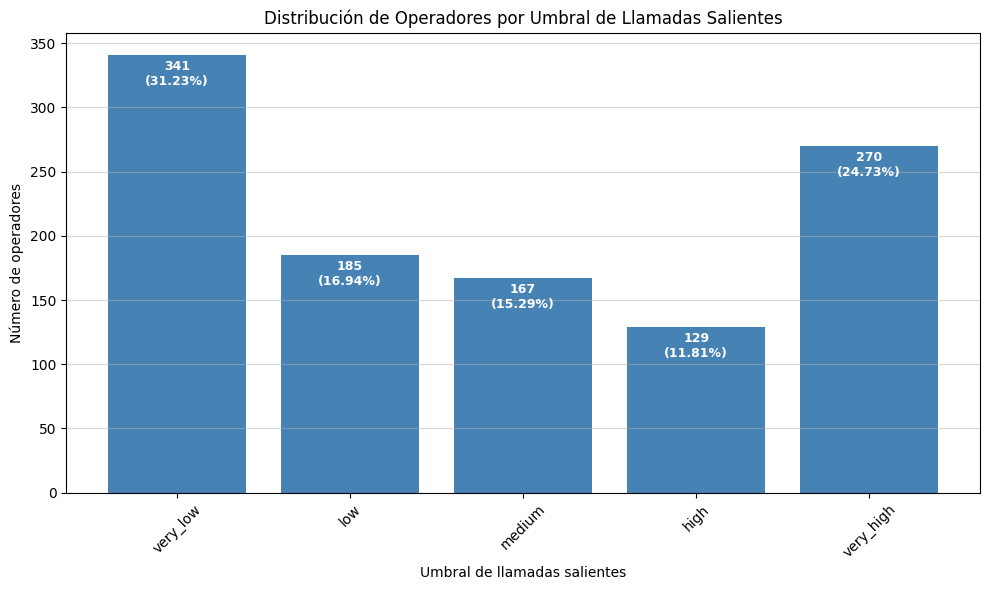

In [43]:
# Gráfico de distribución de umbrales de llamadas salientes
distribution_outgoing = operator_metrics['outgoing_calls_level'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
bars = plt.bar(distribution_outgoing.index.astype(str), distribution_outgoing.values, color='steelblue')

# Añadir valores y porcentajes en las barras
total_operators = len(operator_metrics)
for bar in bars:
    height = bar.get_height()
    percentage = (height / total_operators) * 100
    plt.text(bar.get_x() + bar.get_width()/2., height - 15,  
             f'{height}\n({percentage:.2f}%)', ha='center', va='center', fontsize=9, color='white', weight='bold')

plt.title('Distribución de Operadores por Umbral de Llamadas Salientes')
plt.xlabel('Umbral de llamadas salientes')
plt.ylabel('Número de operadores')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.5)
plt.tight_layout()
plt.show()

**Observaciones:**

- Distribución de llamadas salientes:
    - 'very_low': 341 operadores (31%). Volumen muy bajo  (0-10 llamadas).
    - 'low': 185 operadores (17%). Volumen bajo (11-50 llamadas).
    - 'medium': 167 operadores (15%). Volumen moderado (51-200 llamadas).
    - 'high': 129 operadores (12%). Volumen alto (201-500 llamadas).
    - 'very_high': 270 operadores (25%). Volumen muy alto (501+ llamadas).
    <br>

- 31% de operadores (341) tienen volumen muy bajo de llamadas salientes; candidatos a "ineficaces"

- Existe polarización: muchos operadores con muy poco volumen (31%) y muchos con mucho volumen (25%).

- Solo 27% de operadores tienen volumen moderado-alto ('medium' + 'high')

- Para llamadas salientes, la ineficacia se manifiesta como "volumen bajo".

### 4.2 Sistema de scoring.

In [44]:
# Sistema de scoring combinado

# Convertir niveles categóricos a scores numéricos
level_to_score = {
    'very_low': 5,   # Mejor desempeño
    'low': 4,
    'medium': 3, 
    'high': 2,
    'very_high': 1   # Peor desempeño
}

# Aplicar scoring a cada criterio (asegurando que sean numéricos)
operator_metrics['missed_calls_score'] = operator_metrics['missed_calls_level'].map(level_to_score).astype(int)
operator_metrics['waiting_time_score'] = operator_metrics['waiting_time_level'].map(level_to_score).astype(int)

# Para llamadas salientes, se invierte la lógica (menos llamadas = peor)
outgoing_score_map = {
    'very_low': 1,   # Peor desempeño
    'low': 2,
    'medium': 3,
    'high': 4,
    'very_high': 5   # Mejor desempeño
}
operator_metrics['outgoing_calls_score'] = operator_metrics['outgoing_calls_level'].map(outgoing_score_map).astype(int)

# Calcular score combinado (ahora con valores numéricos)
operator_metrics['combined_score'] = (
    operator_metrics['missed_calls_score'] + 
    operator_metrics['waiting_time_score'] + 
    operator_metrics['outgoing_calls_score']
)

print("Scores asignados por nivel:\n")
print("Llamadas perdidas y tiempo de espera:\n'very_low'=5, 'low'=4, 'medium'=3, 'high'=2, 'very_high'=1\n")
print("Llamadas salientes:\n'very_low'=1, 'low'=2, 'medium'=3, 'high'=4, 'very_high'=5")
print(f"\nRango de score combinado:\n{operator_metrics['combined_score'].min()} a {operator_metrics['combined_score'].max()}")

Scores asignados por nivel:

Llamadas perdidas y tiempo de espera:
'very_low'=5, 'low'=4, 'medium'=3, 'high'=2, 'very_high'=1

Llamadas salientes:
'very_low'=1, 'low'=2, 'medium'=3, 'high'=4, 'very_high'=5

Rango de score combinado:
7 a 13


In [45]:
# Análisis del score combinado
score_distribution = operator_metrics['combined_score'].value_counts().sort_index()
print("Distribución de operadores por score combinado:")
for score in sorted(score_distribution.index):
    count = score_distribution[score]
    percentage = (count / len(operator_metrics)) * 100
    print(f"  - Score {score}: {count} operadores ({percentage:.2f}%)")

Distribución de operadores por score combinado:
  - Score 7: 9 operadores (0.82%)
  - Score 8: 104 operadores (9.52%)
  - Score 9: 365 operadores (33.42%)
  - Score 10: 352 operadores (32.23%)
  - Score 11: 245 operadores (22.44%)
  - Score 12: 14 operadores (1.28%)
  - Score 13: 3 operadores (0.27%)


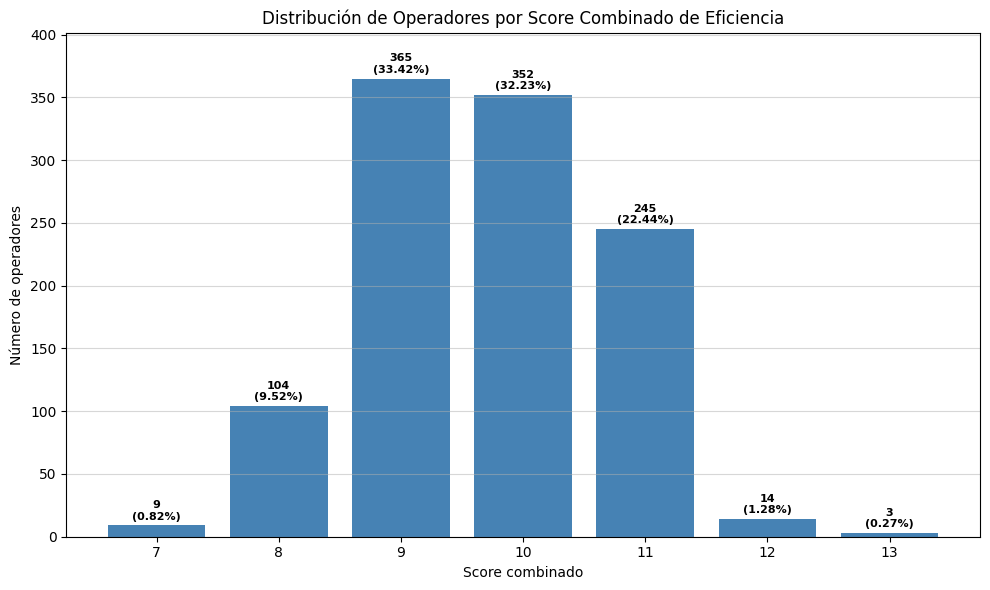

In [46]:
# Gráfico de distribución de scores combinados
score_distribution = operator_metrics['combined_score'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
bars = plt.bar(score_distribution.index.astype(str), score_distribution.values, color='steelblue')

# Añadir valores y porcentajes en las barras
total_operators = len(operator_metrics)
for bar in bars:
    height = bar.get_height()
    percentage = (height / total_operators) * 100
    plt.text(bar.get_x() + bar.get_width()/2., height + 3,  
             f'{height}\n({percentage:.2f}%)', ha='center', va='bottom', fontsize=8, weight='bold' )

plt.title('Distribución de Operadores por Score Combinado de Eficiencia')
plt.xlabel('Score combinado')
plt.ylabel('Número de operadores')
plt.ylim(0, max(score_distribution.values) * 1.1)
plt.grid(axis='y', alpha=0.5)
plt.tight_layout()
plt.show()

**Observaciones:**

- Distribución de scores:
    - Score 7-8: 113 operadores (10.3%). Desempeño bajo. Fuertes candidatos a "ineficaces".
    - Score 9-10: 717 operadores (65.7%). Desempeño promedio. Con oportunidades de mejora.
    - Score 11: 245 operadores (22.4%). Desempeño destacado.
    - Score 12-13: 17 operadores (1.5%). Desempeño excepcional.
    <br>

- Distribución normal: La mayoría (88%) se concentra en scores medios (9-11).

- Pocos extremos: Solo hay 10% en desempeño bajo y 2% en desempeño alto.

- Score óptimo: 11 puntos (22.4% de operadores).

### 4.3 Establecimiento de umbrales de eficacia.

In [47]:
# Establecimiento de Umbrales de Eficacia

# Definir umbrales de eficacia basados en la distribución de scores
efficacy_thresholds = {
    'inefficient': 8,      # Score ≤ 8
    'needs_improvement': 9, # Score 9-10  
    'efficient': 11,       # Score 11
    'highly_efficient': 12 # Score ≥ 12
}

print("Umbrales de eficacia definidos:")
for level, threshold in efficacy_thresholds.items():
    print(f"  - '{level}': score {threshold}")

# Clasificar operadores por nivel de eficacia
def classify_efficacy(score):
    if score <= 8:
        return 'inefficient'
    elif score <= 10:
        return 'needs_improvement'
    elif score <= 11:
        return 'efficient'
    else:
        return 'highly_efficient'

operator_metrics['efficacy_level'] = operator_metrics['combined_score'].apply(classify_efficacy)

# Distribución final de eficacia
print("\nDistribución final de eficacia:")
efficacy_distribution = operator_metrics['efficacy_level'].value_counts()
for level in ['inefficient', 'needs_improvement', 'efficient', 'highly_efficient']:
    count = efficacy_distribution.get(level, 0)
    percentage = (count / len(operator_metrics)) * 100
    print(f"  - '{level}': {count} operadores ({percentage:.2f}%)")

Umbrales de eficacia definidos:
  - 'inefficient': score 8
  - 'needs_improvement': score 9
  - 'efficient': score 11
  - 'highly_efficient': score 12

Distribución final de eficacia:
  - 'inefficient': 113 operadores (10.35%)
  - 'needs_improvement': 717 operadores (65.66%)
  - 'efficient': 245 operadores (22.44%)
  - 'highly_efficient': 17 operadores (1.56%)


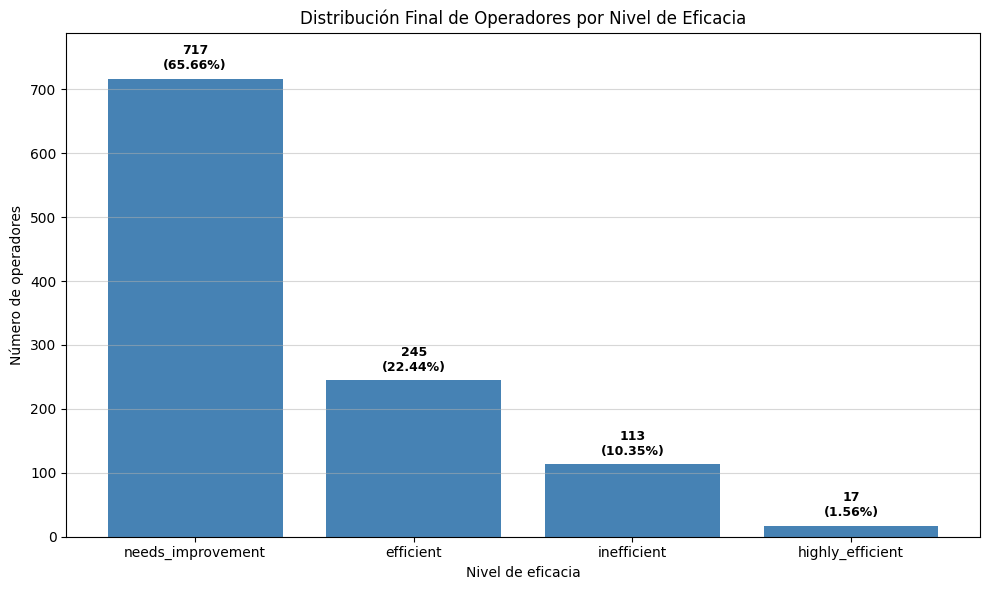

In [48]:
# Gráfico de distribución final de eficacia
efficacy_distribution = operator_metrics['efficacy_level'].value_counts()

plt.figure(figsize=(10, 6))
bars = plt.bar(efficacy_distribution.index, efficacy_distribution.values, color='steelblue')

# Añadir valores y porcentajes 
total_operators = len(operator_metrics)
for bar in bars:
    height = bar.get_height()
    percentage = (height / total_operators) * 100
    
    # Posición de las etiquetas
    y_position = height + 10
    plt.text(bar.get_x() + bar.get_width()/2., y_position,  
             f'{height}\n({percentage:.2f}%)', ha='center', va='bottom', 
             fontsize=9, color='black', weight='bold')

plt.title('Distribución Final de Operadores por Nivel de Eficacia')
plt.xlabel('Nivel de eficacia')
plt.ylabel('Número de operadores')
plt.ylim(0, max(efficacy_distribution.values) * 1.1)  
plt.grid(axis='y', alpha=0.5)
plt.tight_layout()
plt.show()

**Observaciones:**

- Distribución final de eficacia:
    - 'inefficient': 113 operadores (10.4%). Scores 7-8, operadores ineficaces.
    - 'needs_improvement': 717 operadores (65.7%). Scores 9-10, necesitan mejora.
    - 'efficient': 245 operadores (22.4%). Score 11, operadores eficientes.
    - 'highly_efficient': 17 operadores (1.6%). Scores 12-13, operadores muy eficientes.
    <br>

- 10.4% de operadores (113) son ineficaces, objetivo principal del análisis.

- 65.7% de operadores necesitan mejora, oportunidad de capacitación masiva.

- Solo 24% de operadores son eficientes o muy eficientes.

- Distribución desbalanceada: Hay muchos operadores en la zona de mejora, y pocos en excelencia.

### 4.4 Clasificación final de operadores.

In [49]:
# Clasificación Final de Operadores

# Identificar operadores ineficaces
inefficient_operators = operator_metrics[operator_metrics['efficacy_level'] == 'inefficient']

print(f"Total de operadores ineficaces identificados: {len(inefficient_operators)}")
print("\nDetalles de operadores ineficaces:")
display(inefficient_operators[['operator_id', 'combined_score', 'efficacy_level', 
                            'missed_calls', 'avg_waiting_time', 'outgoing_calls']])

# Estadísticas de los operadores ineficaces
print("\nEstadísticas de operadores ineficaces:")
print(f" - Llamadas perdidas promedio: {inefficient_operators['missed_calls'].mean():.2f}")
print(f" - Tiempo espera promedio: {inefficient_operators['avg_waiting_time'].mean():.2f} segundos")
print(f" - Llamadas salientes promedio: {inefficient_operators['outgoing_calls'].mean():.2f}")

Total de operadores ineficaces identificados: 113

Detalles de operadores ineficaces:


,operator_id,combined_score,efficacy_level,missed_calls,avg_waiting_time,outgoing_calls
1,879898.0,8,inefficient,89,459.690265,7256
3,880022.0,8,inefficient,29,53.971429,189
5,880028.0,8,inefficient,82,210.178218,2519
6,880240.0,8,inefficient,7,47.333333,47
12,882686.0,8,inefficient,83,288.763393,3582
...,...,...,...,...,...,...
940,951650.0,8,inefficient,2,51.750000,10
946,952392.0,8,inefficient,21,678.340909,1496
947,952458.0,8,inefficient,25,844.000000,1556
958,952948.0,8,inefficient,46,225.372340,4414



Estadísticas de operadores ineficaces:
 - Llamadas perdidas promedio: 36.96
 - Tiempo espera promedio: 634.62 segundos
 - Llamadas salientes promedio: 2539.22


In [50]:
# Lista completa de operadores ineficaces
print("Operadores ineficaces:")
for idx, row in inefficient_operators.iterrows():
    print(f"ID: {row['operator_id']} | Score: {row['combined_score']} | "
          f"Llamadas perdidas: {row['missed_calls']} | "
          f"Tiempo espera: {row['avg_waiting_time']:.2f}s | "
          f"Llamadas salientes: {row['outgoing_calls']}")

Operadores ineficaces:
ID: 879898.0 | Score: 8 | Llamadas perdidas: 89 | Tiempo espera: 459.69s | Llamadas salientes: 7256
ID: 880022.0 | Score: 8 | Llamadas perdidas: 29 | Tiempo espera: 53.97s | Llamadas salientes: 189
ID: 880028.0 | Score: 8 | Llamadas perdidas: 82 | Tiempo espera: 210.18s | Llamadas salientes: 2519
ID: 880240.0 | Score: 8 | Llamadas perdidas: 7 | Tiempo espera: 47.33s | Llamadas salientes: 47
ID: 882686.0 | Score: 8 | Llamadas perdidas: 83 | Tiempo espera: 288.76s | Llamadas salientes: 3582
ID: 882690.0 | Score: 8 | Llamadas perdidas: 23 | Tiempo espera: 581.76s | Llamadas salientes: 1566
ID: 883942.0 | Score: 8 | Llamadas perdidas: 58 | Tiempo espera: 189.50s | Llamadas salientes: 2072
ID: 884408.0 | Score: 8 | Llamadas perdidas: 10 | Tiempo espera: 61.44s | Llamadas salientes: 46
ID: 884478.0 | Score: 8 | Llamadas perdidas: 41 | Tiempo espera: 427.42s | Llamadas salientes: 2280
ID: 884946.0 | Score: 8 | Llamadas perdidas: 37 | Tiempo espera: 480.74s | Llamadas sa

## 5. Pruebas de hipótesis:
### 5.1 Formulación de hipótesis de estadísticas relevante, comparando operadores eficientes vs ineficientes.

In [51]:
# Preparación de grupos para pruebas estadísticas

# Definir grupos comparativos
inefficient_group = operator_metrics[operator_metrics['efficacy_level'] == 'inefficient']
efficient_group = operator_metrics[operator_metrics['efficacy_level'].isin(['efficient', 'highly_efficient'])]

print(f"Tamaño de grupos:")
print(f"  - Grupo ineficiente: {len(inefficient_group)} operadores")
print(f"  - Grupo eficiente: {len(efficient_group)} operadores")
print(f"  - Total grupos comparados: {len(inefficient_group) + len(efficient_group)}")

Tamaño de grupos:
  - Grupo ineficiente: 113 operadores
  - Grupo eficiente: 262 operadores
  - Total grupos comparados: 375


**Hipótesis a comprobar:**
- Hipótesis sobre llamadas perdidas:
    - H0: No hay diferencia significativa en llamadas perdidas entre operadores eficientes e ineficientes.
    - H1: Los operadores ineficientes tienen significativamente más llamadas perdidas.
    <br>

- Hipótesis sobre tiempo de espera:
    - H0: No hay diferencia significativa en tiempo de espera entre operadores eficientes e ineficientes.
    - H1: Los operadores ineficientes tienen significativamente mayor tiempo de espera.
    <br>

- Hipótesis sobre llamadas salientes:
    - H0: No hay diferencia significativa en volumen de llamadas salientes entre grupos.
    - H1: Los operadores ineficientes tienen significativamente menos llamadas salientes.
    <br>

- Hipótesis sobre patrones de uso:
    - H0: No hay diferencia significativa en la distribución de tipos de llamada entre grupos.
    - H1: Los operadores ineficientes tienen patrones de uso diferentes.

***Variables a comparar:***

- Llamadas perdidas (numérica continua)
- Tiempo de espera promedio (numérica continua)
- Volumen de llamadas salientes (numérica continua)
- Distribución de tipos de llamada (categórica)

### 5.2 Aplicación de tests según naturaleza de datos (t-test, chi2):
#### 5.2.1 Test T-Student para llamadas perdidas.

In [52]:
# Aplicación de tests, llamadas perdidas

# Test t para muestras independientes (numérica continua)
t_statistic, p_value = stats.ttest_ind(
    inefficient_group['missed_calls'],
    efficient_group['missed_calls'],
    equal_var=False  # No asumir varianzas iguales
)

print("Test T-Student para muestras independientes:\n")
print(f"Variable: Llamadas perdidas")

print(f"\nGrupo ineficiente:")
print(f" - Número de operadores: {len(inefficient_group)}")
print(f" - Promedio: {inefficient_group['missed_calls'].mean():.2f}")
print(f" - Desviación estándar: {inefficient_group['missed_calls'].std():.2f}")

print(f"\nGrupo eficiente:")
print(f" - Número de operadores: {len(efficient_group)}")
print(f" - Promedio: {efficient_group['missed_calls'].mean():.2f}")
print(f" - Desviación estándar: {efficient_group['missed_calls'].std():.2f}")

print(f"\nEstadístico t: {t_statistic:6f}")
print(f"\nValor p: {p_value}")

Test T-Student para muestras independientes:

Variable: Llamadas perdidas

Grupo ineficiente:
 - Número de operadores: 113
 - Promedio: 36.96
 - Desviación estándar: 23.89

Grupo eficiente:
 - Número de operadores: 262
 - Promedio: 1.61
 - Desviación estándar: 3.31

Estadístico t: 15.666964

Valor p: 3.468147779401002e-30


In [53]:
# Interpretación del resultado
print("Interpretación:\n")
alpha = 0.05  

if p_value < alpha:
    print("Resultado: Significativo estadísticamente")
    print(" - Se rechaza H0: Hay diferencia significativa en llamadas perdidas")
    print(" - Operadores ineficientes tienen más llamadas perdidas")
else:
    print(" - Resultado: No significativo estadísticamente")  
    print(" - NO se rechaza H0: No hay diferencia significativa")

print(f"\nNivel de confianza: {(1-alpha)*100}%")
print(f"Diferencia promedio: {inefficient_group['missed_calls'].mean() - efficient_group['missed_calls'].mean():.2f} llamadas")

Interpretación:

Resultado: Significativo estadísticamente
 - Se rechaza H0: Hay diferencia significativa en llamadas perdidas
 - Operadores ineficientes tienen más llamadas perdidas

Nivel de confianza: 95.0%
Diferencia promedio: 35.35 llamadas


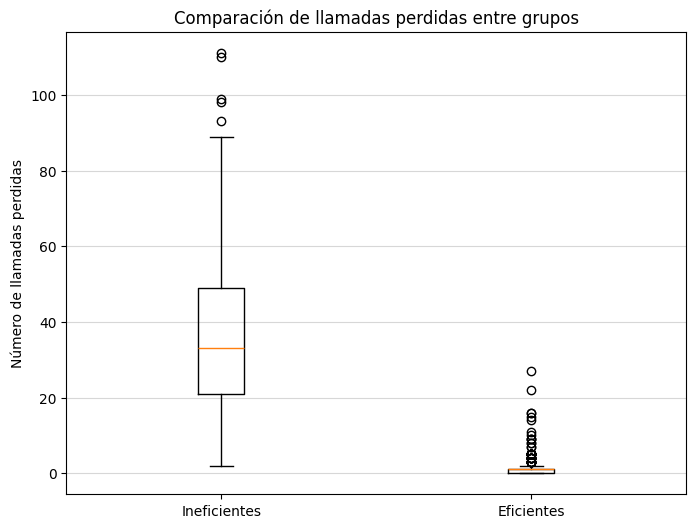

In [54]:
# Boxplot comparativo de llamadas perdidas
plt.figure(figsize=(8, 6))
data = [inefficient_group['missed_calls'], efficient_group['missed_calls']]
labels = ['Ineficientes', 'Eficientes']
plt.boxplot(data, labels=labels)
plt.title('Comparación de llamadas perdidas entre grupos')
plt.ylabel('Número de llamadas perdidas')
plt.grid(axis='y', alpha=0.5)
plt.show()

**Observaciones:**

- Diferencia enorme: 36.96 vs 1.61 llamadas perdidas
  
- Alta significancia: p-value extremadamente bajo (3.47e-30)

- Variabilidad: Grupo ineficiente mucho más variable (23.89 ineficientes vs 3.31 eficientes).

#### 5.2.2 Test T-Student para tiempo de espera.

In [55]:
# Aplicación de tests, tiempo de espera

# Test t para muestras independientes
t_statistic, p_value = stats.ttest_ind(
    inefficient_group['avg_waiting_time'],
    efficient_group['avg_waiting_time'],
    equal_var=False
)

print("Test T-Student para muestras independientes:")
print(f"\nGrupo ineficiente:")
print(f" - Número de operadores: {len(inefficient_group)}")
print(f" - Promedio: {inefficient_group['avg_waiting_time'].mean():.2f} segundos")
print(f" - Desviación estándar: {inefficient_group['avg_waiting_time'].std():.2f}")

print(f"\nGrupo eficiente:")
print(f" - Número de operadores: {len(efficient_group)}")
print(f" - Promedio: {efficient_group['avg_waiting_time'].mean():.2f} segundos")
print(f" - Desviación estándar: {efficient_group['avg_waiting_time'].std():.2f}")

print(f"\nEstadístico t: {t_statistic:.4f}")
print(f"\nValor p: {p_value}")

Test T-Student para muestras independientes:

Grupo ineficiente:
 - Número de operadores: 113
 - Promedio: 634.62 segundos
 - Desviación estándar: 748.65

Grupo eficiente:
 - Número de operadores: 262
 - Promedio: 18.61 segundos
 - Desviación estándar: 16.22

Estadístico t: 8.7460

Valor p: 2.543612408665012e-14


In [56]:
# Interpretación del resultado
alpha = 0.05

if p_value < alpha:
    print("Resultado: Significativo estadísticamente")
    print(" - Se rechaza H0: Hay diferencia significativa en tiempo de espera")
    print(" - Operadores ineficientes tienen mayor tiempo de espera")
else:
    print("Resultado: No significativo estadísticamente")  
    print(" - NO se rechaza H0: No hay diferencia significativa")

print(f"\nNivel de confianza: {(1-alpha)*100}%")
print(f"Diferencia promedio: {inefficient_group['avg_waiting_time'].mean() - efficient_group['avg_waiting_time'].mean():.2f} segundos")
print(f"Equivalente: {(inefficient_group['avg_waiting_time'].mean() - efficient_group['avg_waiting_time'].mean())/60:.2f} minutos")

Resultado: Significativo estadísticamente
 - Se rechaza H0: Hay diferencia significativa en tiempo de espera
 - Operadores ineficientes tienen mayor tiempo de espera

Nivel de confianza: 95.0%
Diferencia promedio: 616.02 segundos
Equivalente: 10.27 minutos


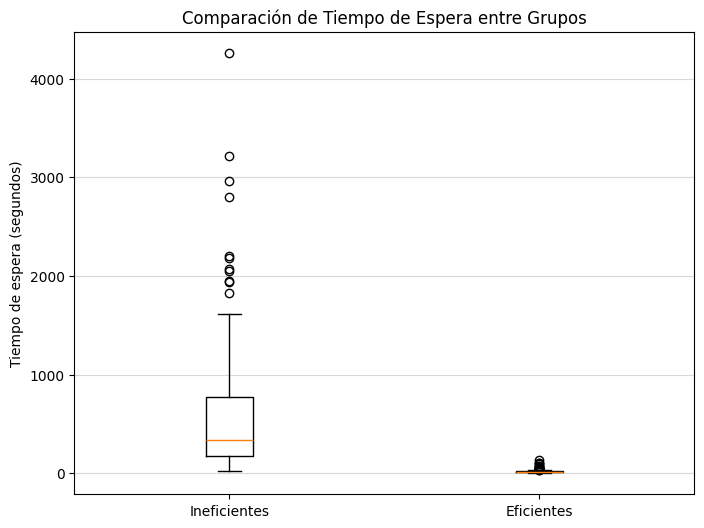

In [57]:
# Boxplot comparativo de tiempo de espera
plt.figure(figsize=(8, 6))
data = [inefficient_group['avg_waiting_time'], efficient_group['avg_waiting_time']]
labels = ['Ineficientes', 'Eficientes']
plt.boxplot(data, labels=labels)
plt.title('Comparación de Tiempo de Espera entre Grupos')
plt.ylabel('Tiempo de espera (segundos)')
plt.grid(axis='y', alpha=0.5)
plt.show()

**Observaciones:**

- Diferencia dramática: 634.62 segundos (ineficientes) vs 18.61 segundos (eficientes) (10.3 minutos vs 19 segundos).

- Alta significancia: p-value extremadamente bajo (2.54e-14).

- Variabilidad extrema: Grupo ineficiente muy inconsistente (748.65 ineficientes vs 16.22 eficientes).

- Los clientes esperan 10+ minutos más con operadores ineficientes.

- Interpretación operacional:
    - Operadores eficientes: Respuesta en <20 segundos (estándar).
    - Operadores ineficientes: Respuesta en >10 minutos (inaceptable).

#### 5.2.3 Test T-Student para volumen de llamadas salientes.

In [58]:
# Aplicación de tests, volumen de llamadas salientes

# Test t para muestras independientes
t_statistic, p_value = stats.ttest_ind(
    inefficient_group['outgoing_calls'],
    efficient_group['outgoing_calls'],
    equal_var=False
)

print("Test T-Student para muestras independientes:")
print(f"\nGrupo ineficiente:")
print(f" - Número de operadores: {len(inefficient_group)}")
print(f" - Promedio: {inefficient_group['outgoing_calls'].mean():.2f} llamadas")
print(f" - Desviación estándar: {inefficient_group['outgoing_calls'].std():.2f}")

print(f"\nGrupo eficiente:")
print(f" - Número de operadores: {len(efficient_group)}")
print(f" - Promedio: {efficient_group['outgoing_calls'].mean():.2f} llamadas")
print(f" - Desviación estándar: {efficient_group['outgoing_calls'].std():.2f}")

print(f"\nEstadístico t: {t_statistic:.4f}")
print(f"\nValor p: {p_value}")

Test T-Student para muestras independientes:

Grupo ineficiente:
 - Número de operadores: 113
 - Promedio: 2539.22 llamadas
 - Desviación estándar: 3292.19

Grupo eficiente:
 - Número de operadores: 262
 - Promedio: 27.14 llamadas
 - Desviación estándar: 69.51

Estadístico t: 8.1105

Valor p: 7.045283442349141e-13


In [59]:
# Interpretación del resultado
alpha = 0.05

if p_value < alpha:
    print("Resultado: Significativo estadísticamente")
    if inefficient_group['outgoing_calls'].mean() > efficient_group['outgoing_calls'].mean():
        print(" - Se rechaza H0: Hay diferencia significativa en volumen de llamadas salientes")
        print(" - Operadores ineficientes tienen MAYOR volumen de llamadas salientes")
    else:
        print(" - Se rechaza H0: Hay diferencia significativa en volumen de llamadas salientes")  
        print(" - Operadores ineficientes tienen MENOR volumen de llamadas salientes")
else:
    print("Resultado: No significativo estadísticamente")  
    print(" - No se rechaza H0: No hay diferencia significativa")

print(f"\nNivel de confianza: {(1-alpha)*100}%")
print(f"Diferencia promedio: {inefficient_group['outgoing_calls'].mean() - efficient_group['outgoing_calls'].mean():.2f} llamadas")

Resultado: Significativo estadísticamente
 - Se rechaza H0: Hay diferencia significativa en volumen de llamadas salientes
 - Operadores ineficientes tienen MAYOR volumen de llamadas salientes

Nivel de confianza: 95.0%
Diferencia promedio: 2512.08 llamadas


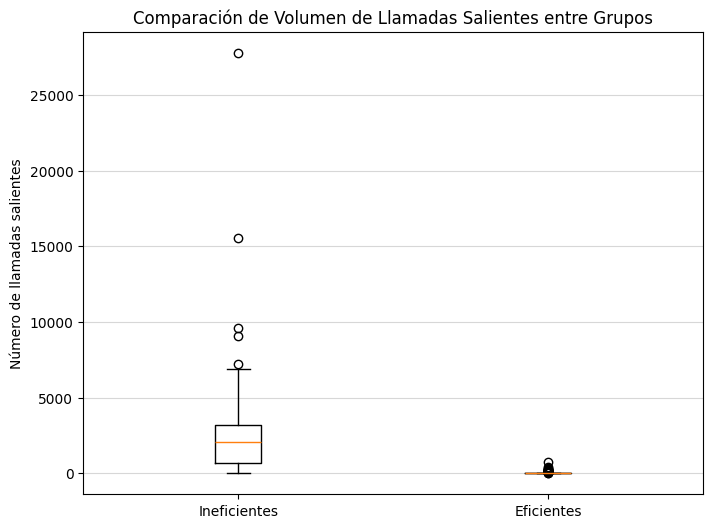

In [60]:
# Boxplot comparativo de llamadas salientes
plt.figure(figsize=(8, 6))
data = [inefficient_group['outgoing_calls'], efficient_group['outgoing_calls']]
labels = ['Ineficientes', 'Eficientes']
plt.boxplot(data, labels=labels)
plt.title('Comparación de Volumen de Llamadas Salientes entre Grupos')
plt.ylabel('Número de llamadas salientes')
plt.grid(axis='y', alpha=0.5)
plt.show()

**Observaciones:**

- Operadores ineficientes: 2,539 llamadas salientes (demasiado alto).

- Operadores eficientes: 27 llamadas salientes (muy bajo).

- Diferencia enorme: 2,512 llamadas más en el grupo ineficiente.

- Interpretación posible:
    - Roles diferentes: Ineficientes podrían ser equipos de ventas/outbound.
    - Variabilidad extrema: De 3,292 en ineficientes vs 69 en eficientes.
    - Sugiere distribución muy desigual en grupo ineficiente.
    - La ineficacia no se relaciona con poco volumen, sino posiblemente con una mala gestión de volumen alto.

#### 5.2.4 Test Chi-cuadrado para proporciones.

In [61]:
# Aplicación de tests, distribución de tipos de llamada

# Calcular proporciones para cada grupo
def calcular_proporciones(grupo):
    total = grupo['total_calls']
    return {
        'incoming_ratio': grupo['incoming_calls'] / total,
        'outgoing_ratio': grupo['outgoing_calls'] / total,
        'internal_ratio': grupo['internal_calls'] / total,
        'external_ratio': grupo['external_calls'] / total
    }

# Proporciones por grupo
inefficient_ratios = calcular_proporciones(inefficient_group)
efficient_ratios = calcular_proporciones(efficient_group)

print("Proporciones de tipos de llamada:")
print(f"\nGrupo ineficiente:")
print(f" - Número de operadores: {len(inefficient_group)}")
print(f" - Entrantes: {inefficient_ratios['incoming_ratio'].mean():.4f}")
print(f" - Salientes: {inefficient_ratios['outgoing_ratio'].mean():.4f}")
print(f" - Internas: {inefficient_ratios['internal_ratio'].mean():.4f}")
print(f" - Externas: {inefficient_ratios['external_ratio'].mean():.4f}")

print(f"\nGrupo eficiente:")
print(f" - Número de operadores: {len(efficient_group)}")
print(f" - Entrantes: {efficient_ratios['incoming_ratio'].mean():.4f}")
print(f" - Salientes: {efficient_ratios['outgoing_ratio'].mean():.4f}")
print(f" - Internas: {efficient_ratios['internal_ratio'].mean():.4f}")
print(f" - Externas: {efficient_ratios['external_ratio'].mean():.4f}")

Proporciones de tipos de llamada:

Grupo ineficiente:
 - Número de operadores: 113
 - Entrantes: 0.0263
 - Salientes: 0.9737
 - Internas: 0.0099
 - Externas: 0.9901

Grupo eficiente:
 - Número de operadores: 262
 - Entrantes: 0.4180
 - Salientes: 0.5820
 - Internas: 0.1313
 - Externas: 0.8687


In [62]:
# Test Chi-cuadrado para proporciones

# Crear tabla de contingencia
contingency_table = [
    [inefficient_group['incoming_calls'].sum(), inefficient_group['outgoing_calls'].sum()],
    [efficient_group['incoming_calls'].sum(), efficient_group['outgoing_calls'].sum()]
]

chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"Test Chi-cuadrado para proporciones:")
print(f"\nEstadístico chi-cuadrado: {chi2:.4f}")
print(f"\nValor p: {p_value}")
print(f"\nGrados de libertad: {dof}")

# Interpretación
print("\nInterpretación:")
alpha = 0.05

if p_value < alpha:
    print(" - Resultado: Significativo estadísticamente")
    print(" - Se rechaza H0: Hay diferencia significativa en distribución de tipos de llamada")
    print(" - Los grupos tienen patrones de uso diferentes")
else:
    print("Resultado: No significativo estadísticamente")  
    print(" - No se rechaza H0: No hay diferencia en distribución de tipos")

print(f"\nNivel de confianza: {(1-alpha)*100}%")

Test Chi-cuadrado para proporciones:

Estadístico chi-cuadrado: 31487.8933

Valor p: 0.0

Grados de libertad: 1

Interpretación:
 - Resultado: Significativo estadísticamente
 - Se rechaza H0: Hay diferencia significativa en distribución de tipos de llamada
 - Los grupos tienen patrones de uso diferentes

Nivel de confianza: 95.0%


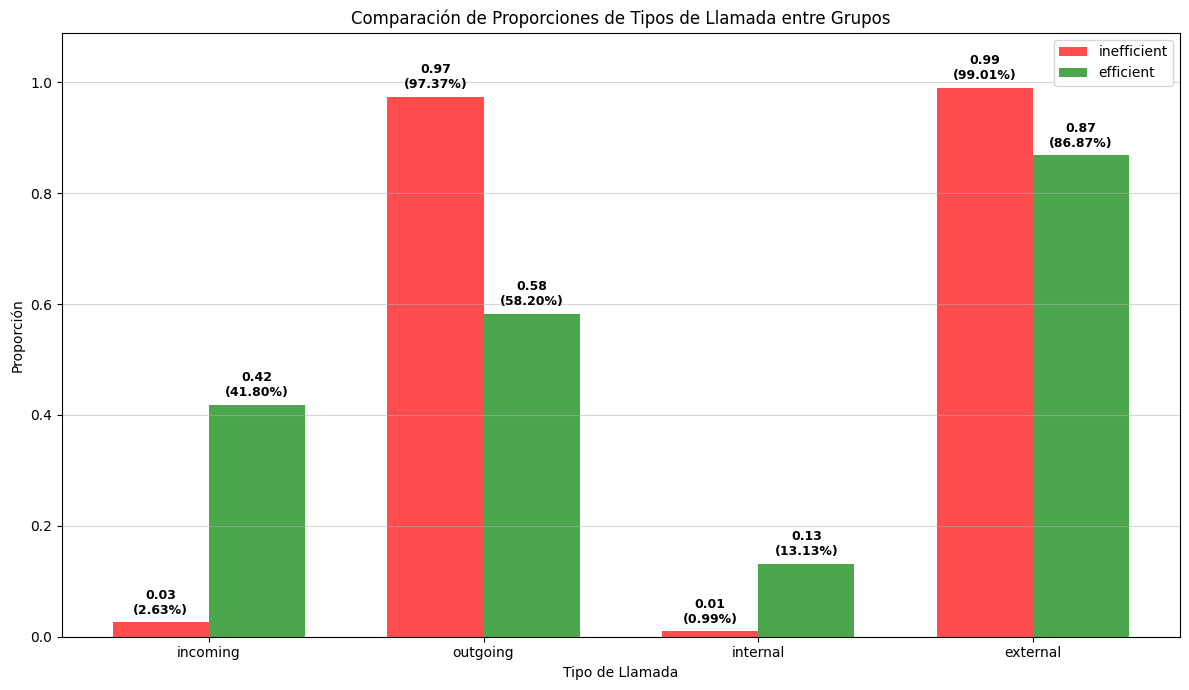

In [63]:
# Gráfico de barras comparativo
plt.figure(figsize=(12, 7))
call_types = ['incoming', 'outgoing', 'internal', 'external']
inefficient_proportions = [
    inefficient_ratios['incoming_ratio'].mean(),
    inefficient_ratios['outgoing_ratio'].mean(), 
    inefficient_ratios['internal_ratio'].mean(),
    inefficient_ratios['external_ratio'].mean()
]
efficient_proportions = [
    efficient_ratios['incoming_ratio'].mean(),
    efficient_ratios['outgoing_ratio'].mean(),
    efficient_ratios['internal_ratio'].mean(),
    efficient_ratios['external_ratio'].mean()
]

x_pos = np.arange(len(call_types))
width = 0.35

bars1 = plt.bar(x_pos - width/2, inefficient_proportions, width, label='inefficient', alpha=0.7, color='red')
bars2 = plt.bar(x_pos + width/2, efficient_proportions, width, label='efficient', alpha=0.7, color='green')

# Añadir valores y porcentajes en las barras (arriba de las barras en negro)
for i, (bar1, bar2) in enumerate(zip(bars1, bars2)):
    height1 = bar1.get_height()
    height2 = bar2.get_height()
    plt.text(bar1.get_x() + bar1.get_width()/2., height1 + 0.01, 
             f'{height1:.2f}\n({height1*100:.2f}%)', 
             ha='center', va='bottom', fontsize=9, color='black', weight='bold')
    plt.text(bar2.get_x() + bar2.get_width()/2., height2 + 0.01, 
             f'{height2:.2f}\n({height2*100:.2f}%)', 
             ha='center', va='bottom', fontsize=9, color='black', weight='bold')

plt.xlabel('Tipo de Llamada')
plt.ylabel('Proporción')
plt.title('Comparación de Proporciones de Tipos de Llamada entre Grupos')
plt.xticks(x_pos, call_types)
plt.legend()
plt.grid(axis='y', alpha=0.5)
plt.ylim(0, max(max(inefficient_proportions), max(efficient_proportions)) * 1.1)
plt.tight_layout()
plt.show()

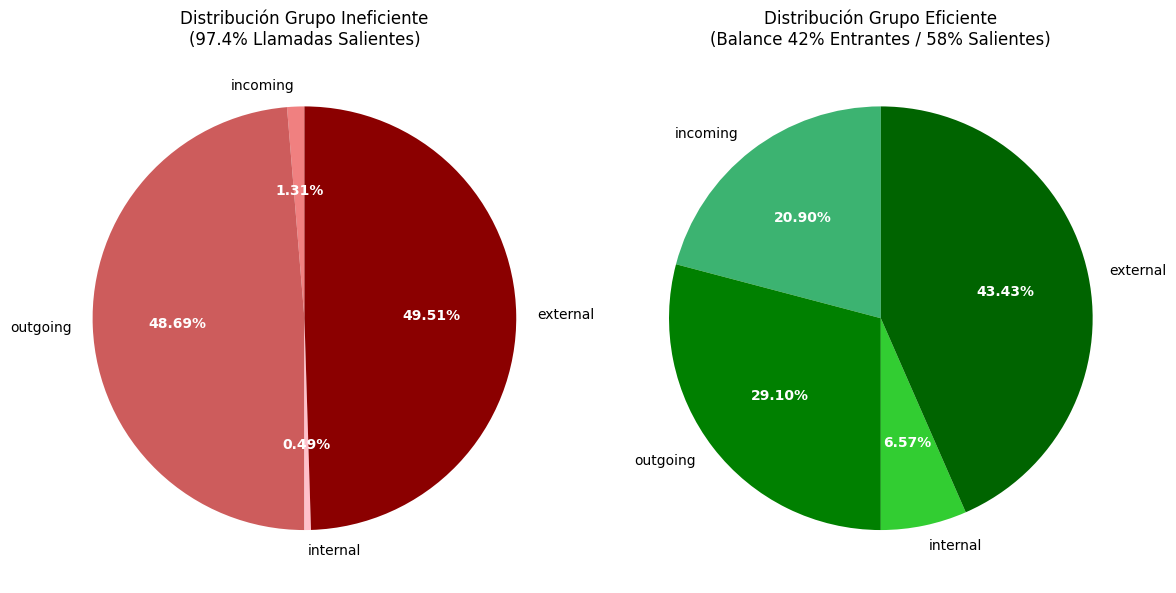

In [64]:
# Gráficas de pastel separadas
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Grupo 'inefficient'
ax1.pie(inefficient_proportions, labels=call_types, autopct='%1.2f%%', startangle=90, 
        colors=['lightcoral', 'indianred', 'pink', 'darkred'])
ax1.set_title('Distribución Grupo Ineficiente\n(97.4% Llamadas Salientes)')

# Grupo 'efficient'
ax2.pie(efficient_proportions, labels=call_types, autopct='%1.2f%%', startangle=90,
        colors=['mediumseagreen', 'green', 'limegreen', 'darkgreen'])
ax2.set_title('Distribución Grupo Eficiente\n(Balance 42% Entrantes / 58% Salientes)')

# Ajustar texto de  porcentajes
for ax in [ax1, ax2]:
    for text in ax.texts:
        if '%' in text.get_text():  
            text.set_color('white')
            text.set_weight('bold')

plt.tight_layout()
plt.show()

**NOTA:**

- La representación en el gráfico circular muestra la distribución entre los 4 tipos de llamada, por lo que el 97.4% de llamadas salientes del grupo ineficiente se distribuye visualmente entre 'outgoing' (48.69%), 'incoming' (1.31%), 'internal' (0.50%) y 'external' (49.50%). El alto porcentaje de llamadas salientes se refleja en la predominancia de las categorías 'outgoing' y 'external'.

**Observaciones:**

- Diferencia extrema en patrones de uso:
    - Especialización radical: 97.37% llamadas salientes en grupo ineficientes vs 58.2% en eficientes.
    - Desbalance operativo: Ineficientes, casi exclusivamente outbound (97.37% salientes).
    - Aislamiento colaborativo: Solo 0.99% llamadas internas en grupo ineficientes vs 13.13% en eficientes.
    <br>

- Interpretación operacional:
    - Especialización perjudicial: Enfoque extremo en outbound correlaciona con ineficiencia.
    - Falta de versatilidad: Operadores ineficientes no manejan llamadas entrantes adecuadamente (solo 2.6%).
    - Ausencia de colaboración: Mínima comunicación interna en grupo ineficiente, poca coordinación.
    <br>

- Recomendación estratégica:
    - Revisar la asignación de roles y promover a operadores versátiles que manejen inbound y outbound, con adecuada colaboración interna.

- Las 4 pruebas de hipótesis confirman consistentemente diferencias estadísticamente significativas entre grupos.

#### 5.2.5 Test T-Student para tasa de contestación.

In [65]:
# Aplicación de tests, tasa de contestación

# Test t para muestras independientes
t_statistic, p_value = stats.ttest_ind(
    inefficient_group['answer_rate'],
    efficient_group['answer_rate'],
    equal_var=False
)

print("Test T-Student para muestras independientes:")
print(f"\nVariable: answer_rate")
print(f"\nGrupo inefficient:")
print(f" - Número de operadores: {len(inefficient_group)}")
print(f" - Promedio: {inefficient_group['answer_rate'].mean():.4f}")
print(f" - Desviación estándar: {inefficient_group['answer_rate'].std():.4f}")

print(f"\nGrupo efficient:")
print(f" - Número de operadores: {len(efficient_group)}")
print(f" - Promedio: {efficient_group['answer_rate'].mean():.4f}")
print(f" - Desviación estándar: {efficient_group['answer_rate'].std():.4f}")
print(f"\nEstadístico t: {t_statistic:.4f}")
print(f"\nValor p: {p_value}")

Test T-Student para muestras independientes:

Variable: answer_rate

Grupo inefficient:
 - Número de operadores: 113
 - Promedio: 0.9536
 - Desviación estándar: 0.0721

Grupo efficient:
 - Número de operadores: 262
 - Promedio: 0.8623
 - Desviación estándar: 0.2552

Estadístico t: 5.3196

Valor p: 1.892013144610615e-07


In [66]:
# Interpretación del resultado
alpha = 0.05
if p_value < alpha:
    print("Resultado: Significativo estadísticamente")
    print(" - Se rechaza H0: Hay diferencia significativa en tasa de contestación")
    print(" - Operadores inefficient tienen menor tasa de contestación")
else:
    print("Resultado: No significativo estadísticamente")  
    print(" - NO se rechaza H0: No hay diferencia significativa")
print(f"\nNivel de confianza: {(1-alpha)*100}%")
print(f"Diferencia promedio: {inefficient_group['answer_rate'].mean() - efficient_group['answer_rate'].mean():.4f}")

Resultado: Significativo estadísticamente
 - Se rechaza H0: Hay diferencia significativa en tasa de contestación
 - Operadores inefficient tienen menor tasa de contestación

Nivel de confianza: 95.0%
Diferencia promedio: 0.0913


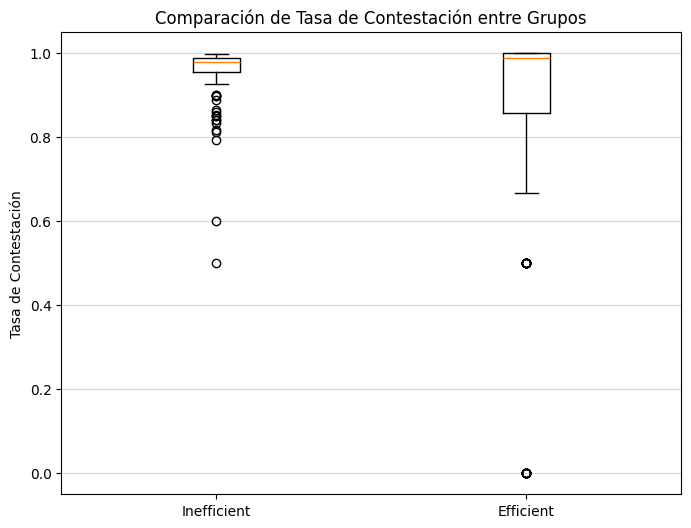

In [67]:
# Boxplot comparativo de tasa de contestación
plt.figure(figsize=(8, 6))
data = [inefficient_group['answer_rate'], efficient_group['answer_rate']]
labels = ['Inefficient', 'Efficient']
plt.boxplot(data, labels=labels)
plt.title('Comparación de Tasa de Contestación entre Grupos')
plt.ylabel('Tasa de Contestación')
plt.grid(axis='y', alpha=0.5)
plt.show()

**Observaciones:**

- Resultado contraintuitivo pero estadísticamente sólido:
    - Diferencia significativa: p-value = 1.89e-07 (altamente significativo).
    - Dirección inesperada: Operadores ineficientes tienen mayor tasa de contestación (95.36% vs 86.23%).
    - Diferencia promedio: +9.13% a favor del grupo ineficientes.
    <br>

- Interpretación:
    - Especialización en outbound: Los operadores ineficientes (97.4% llamadas salientes) controlan mejor la contestación en llamadas que ellos inician.
    - Problema de calidad vs cantidad: Alto 'answer_rate' no garantiza la eficiencia general.
    <br>

- Implicaciones para el análisis:
    - Confirmación de patrones: Coherente con especialización extrema en outbound.
    - Métrica complementaria: 'answer_rate' debe interpretarse en contexto con 'missed_calls' y 'avg_waiting_time'.
    - Revisión de criterios: La eficiencia requiere evaluación multidimensional.

##  6. Conclusiones:
### 6.1 Hallazgos principales.

- **Identificación exitosa de operadores ineficaces:**
    - Se identificaron 113 operadores ineficaces (10.4% del total) mediante sistema de scoring multidimensional.
    - Criterios validados estadísticamente: Todos los tests mostraron una significancia extrema (p-value < 0.0001).
    <br>

- **Patrones de ineficacia identificados:**
    - Tiempos de espera excesivos: 634.62 segundos (ineficientes) vs 18.61 segundos (eficientes) (~34x diferencia).
    - Alto volumen de llamadas perdidas: 36.96 (ineficientes) vs 1.61 llamadas (eficientes) (~23x diferencia).
    - Especialización extrema en outbound: 97.4% llamadas salientes (ineficientes) vs 58.2% llamadas salientes (eficientes).
    - Aislamiento colaborativo: Solo 0.99% llamadas internas (ineficientes) vs 13.13% llamadas internas (eficientes).
    <br>

- **Hallazgo contraintuitivo validado:**
    - Los operadores ineficaces tienen mayor tasa de contestación 95.36% (ineficientes) vs 86.23% (eficientes).
    - Confirma que la eficiencia requiere una evaluación multidimensional, no solo métricas aisladas.

### 6.2 Recomendaciones.

- **Inmediatas (operadores ineficaces):**
    - Reentrenamiento prioritario para los 113 operadores ineficaces identificados.
    - Redistribución de cargas: Balancear llamadas entrantes/salientes.
    - Monitoreo continuo de tiempos de espera y llamadas perdidas.
    <br>

- **Estratégicas (sistema):**
    - Implementar dashboard en tiempo real con las métricas validadas.
    - Establecer estándares operativos:
        - Tiempo de espera máximo: 90 segundos.
        - Llamadas perdidas máximas: 15 por operador.
        - Balance operativo: 40-60% inbound/outbound.
        - Programa de mentores: Asignar operadores eficientes para capacitación de otros operadores.